

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>




# ICE ONLINE STORE

<b>
Objetivo: identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.


 - Empresa: Ice Online Store - comercializa consoles online

 - Base de Dados: Ano anterior. Possivelmente incompleta

 - Descrição dos Dados:
     - Name (nome)
     - Platform (plataforma)
     - Year_of_Release (Ano de lançamento)
     - Genre(gênero)
     - NA_sales (vendas norte-americanas em milhões de USD)
     - EU_sales (vendas na Europa em milhões de USD)
     - JP_sales (vendas no Japão em milhões de USD)
     - Other_sales (vendas em outros países em em milhões de USD)
     - Critic_Score - (Pontuação crítica) (máximo de 100)
     - User_Score - (Pontuação do usuário) (máximo de 10)
     - Classificação (ESRB)
     
 - Hipóteses a serem testadas:
     - "As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas."
     - "As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes."
     
   *Alpha: a critério

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com a introdução
</div>

## Início

### Carregando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mt
import seaborn as sns

### Carregando base de dados

In [2]:
#Carregando o arquivo .csv 
games = pd.read_csv('/datasets/games.csv')

## Explorando os dados

### Informações gerais / resumidas

In [3]:
#Amostra do conjunto de dados
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Informações gerais
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Com isso, o dataset fica com 16713 linhas.

In [5]:
#Descrição Geral
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
#Verficando valores ausentes
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#Valores duplicados
games.duplicated().sum()

0

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


### Corrigindo os dados

#### Alterando os nomes das colunas

In [8]:
# Alterando os nomes das colunas
games.rename(columns = {'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'}, inplace=True)

In [9]:
#Informações gerais
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Conforme visto acima, há a necessidade de uma verificação dos valores nulos em cada coluna antes de prosseguir com a conversão do tipo de dado das colunas

### Tratando valores ausentes

#### Coluna 'name'

In [10]:
#Verificando as linhas das coluna 'name' com valores NaN
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Filtrando os valores nulos na coluna 'name', verifica-se que, além da respectiva coluna, não há informações nas colunas 'genre','critic_score', 'user_score' e 'rating', onde não é possivel fazer comparações ou inferêcias com outras colunas. Sendo assim, a melhor opção é a exclusão dessas linhas.

In [11]:
#Excluindo as linhas com valores NaN 
games = games.dropna(subset = ['name'])

In [12]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [13]:
#Informações gerais
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito
</div>

#### Coluna 'year_of_release'

In [14]:
#Verificando os valores ausentes na coluna 'year_of_release'
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Como verificado acima, a coluna 'year_of_release' contém 269 linhas com NaN. Uma opção de preenchimento é verificar a possibilidade de copiar essa informação verificando o lançamento do mesmo jogo em outras plataformas. Possiveis razões para os valores nulos: 
     
   - jogo com previsão de lançamento para várias plataformas, mas por atrasos do fabricante ou outras razões, a empresa lança o jogo em somente uma plataforma, 
   - lançamento do jogo com atraso
   - problemas intrísecos da própria base de dados (inserção ou na extração dos dados)

In [15]:
#Filtrando um jogo qualquer do gênero 'Sport'
games.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [16]:
#Filtrando um jogo qualquer do gênero 'Action'
games.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [17]:
#Filtrando um jogo qualquer do gênero 'Racing'
games.query('name == "Freaky Flyers"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10551,Freaky Flyers,PS2,2003.0,Racing,0.05,0.04,0.0,0.01,66.0,tbd,T
14532,Freaky Flyers,XB,2003.0,Racing,0.02,0.01,0.0,0.00,64.0,tbd,T
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T


Como exemplo, foi feito um filtro de um jogo  do gênero 'Sport', um do gênero 'Action' e outro do gênero 'Racing', comprovando que é possivel aplicar a abordagem tratada acima. Porém, verificando melhor o dataframe 'games', percebeu-se que há jogos que foram lançados em somente 1 plataforma. Com isso, a abordagem tratada acima não será possivel com esses jogos (linhas), já que os mesmos são únicos. Por isso, a opção adequada no momento é mantê-los na base de dados.

In [18]:
#Fazendo uma cópia do dataframe
games_unique = games

In [19]:
#Filtrando valore únicos
games_unique = games[~games['name'].duplicated(keep=False)]
games_unique_null = games_unique[games_unique['year_of_release'].isnull()]
games_unique_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 475 to 16458
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             123 non-null    object 
 1   platform         123 non-null    object 
 2   year_of_release  0 non-null      float64
 3   genre            123 non-null    object 
 4   na_sales         123 non-null    float64
 5   eu_sales         123 non-null    float64
 6   jp_sales         123 non-null    float64
 7   other_sales      123 non-null    float64
 8   critic_score     42 non-null     float64
 9   user_score       57 non-null     object 
 10  rating           58 non-null     object 
dtypes: float64(6), object(5)
memory usage: 11.5+ KB


Pala análise acima, percebe-se que há 123 jogos com plataformas únicas (0,7% do conjunto total dos dados)

In [20]:
#Amostra do conjunto de dados
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [21]:
#Agrupando por nome e preenchendo os valores nulos na coluna 'years_of_release' com ffill e bfill
games['year_of_release'] = games.groupby('name')['year_of_release'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [22]:
#Verificando valores nulos
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
#Informações gerais
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Após o procedimento, verifica-se que restam 23 linhas na coluna 'years_of_release' que não foram preenchidas.

In [24]:
#Filtrando o conjunto de dados por nome de jogo
games.query('name == "Rock Band"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


In [25]:
#Filtrando o conjunto de dados por nome de jogo
games.query('name == "Test Drive Unlimited 2"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2969,Test Drive Unlimited 2,X360,NaN,Racing,0.30,0.31,0.00,0.07,68.0,6.4,T
3233,Test Drive Unlimited 2,PS3,NaN,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T
7735,Test Drive Unlimited 2,PC,NaN,Racing,0.05,0.11,0.00,0.03,72.0,5.7,T


Filtrando as linhas não preenchidas pelos nomes dos jogos, observa-se que são jogos que foram lançados em várias plataformas, porém nenhuma delas contém a informação 'years_of_release', não sendo mais possivel aplicar tal abordagem. A opção a ser avaliada seria ao invés de deletar essas linhas, preencher a coluna 'years_of_release' com 0.

Com isso, após o tratamento dos valores nulos, o conjunto de dados 'games' contém 16713 linhas com 123 tendo sido tratadas.

In [26]:
#Substituindo os valores NaN por 0
games['year_of_release'].fillna(0, inplace=True)

In [27]:
#Amostra do conjunto de dados
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [28]:
#Informações gerais
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente abordagem, muito bom
</div>

##### Convertendo o tipo de dado

In [29]:
#Convertendo a coluna 'year_of_release' para int
games['year_of_release'] = games['year_of_release'].astype(int)

In [30]:
#Informações gerais
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [31]:
#Amostra do conjunto de dados
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Coluna 'critic_score'

In [32]:
#Verificando valores nulos
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [33]:
#Verificando valores nulos percentuais
games[games['critic_score'].isnull()].shape[0] / games.shape[0]*100

51.313348890085564

Pelos valores acima nota-se que mais da metade dos valores da coluna 'critic_score' estão ausentes, ou seja, 51,3% do total de linhas do conjunto de dados. Analisando melhor abaixo alguns exemplos dos valores acima filtrados com NaN

In [34]:
#Exemplo retirado do conjunto de dados filtrado
games.query('name == "Super Mario Bros."')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN


In [35]:
#Exemplo retirado do conjunto de dados filtrado
games.query('name == "Winning Post 8 2016"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15599,Winning Post 8 2016,PS4,2016,Simulation,0.0,0.0,0.02,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.0,0.0,0.01,0.0,NaN,NaN,NaN


In [36]:
#Exemplo retirado do conjunto de dados filtrado
games.query('name == "Tetris"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
157,Tetris,NES,1988,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN


Pelos filtros feitos acima com nomes retirados dos valores NaN da coluna 'critic_score', percebe-se que não é possivel um grande agrupamento pelo nome afim de preencher o valor NaN.

In [37]:
#Agrupando por nome e preenchendo os valores nulos na coluna 'critic_score' com ffill e bfill
games['critic_score'] = games.groupby('name')['critic_score'].apply(lambda x: x.fillna(method='ffill'))

In [38]:
#Verificando valores nulos e criando um novo dataframe
critic_score = games[games['critic_score'].isnull()]

In [39]:
#Amostra do conjunto de dados
critic_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [40]:
#Verificando valores nulos percentuais
games[games['critic_score'].isnull()].shape[0] / games.shape[0]*100

47.1249925207922

Após o procedimento acima, foram preenchidos 880 linhas na coluna 'critic_score', restando 7876 linhas com valores NaN (47%). 

In [41]:
#Contando os valores nulos agrupado por nome de plataforma
critic_score.groupby(['platform']).count().sort_values(by='year_of_release', ascending=False)

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
DS,1385,1385,1385,1385,1385,1385,1385,0,521,521
PS,981,981,981,981,981,981,981,0,12,10
PS2,787,787,787,787,787,787,787,0,109,109
PSP,689,689,689,689,689,689,689,0,35,34
Wii,688,688,688,688,688,688,688,0,380,383
PS3,405,405,405,405,405,405,405,0,60,59
GBA,342,342,342,342,342,342,342,0,57,58
3DS,326,326,326,326,326,326,326,0,52,49
N64,302,302,302,302,302,302,302,0,0,0


Criando um novo dataframe somente com valores nulos e agrupando por plataforma,é possivel verificar quais plataformas possuem o maior número de dados faltantes nesse campo:
   - DS: 1385 - 17%
   - PS:  981 - 12%
   - PS2: 787 - 10%
   - PSP: 689 -  8%
   - Wii: 688 -  8%

In [42]:
#Contando os valores nulos agrupado por ano
critic_score.groupby(['year_of_release']).count().sort_values(by='name', ascending=False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
year_of_release,,,,,,,,,,
2010,714,714,714,714,714,714,714,0,262,265
2009,712,712,712,712,712,712,712,0,312,307
2008,659,659,659,659,659,659,659,0,230,225
2011,607,607,607,607,607,607,607,0,194,190
2007,484,484,484,484,484,484,484,0,111,112
2006,372,372,372,372,372,372,372,0,50,51
1998,350,350,350,350,350,350,350,0,5,5
1999,294,294,294,294,294,294,294,0,3,3
2012,292,292,292,292,292,292,292,0,21,25


Agrupando por ano ('year_of_release'),é possivel verificar quais anos possuem o maior número de dados faltantes nesse campo:
   - 2009: 714 - 9%
   - 2010: 712 - 8%
   - 2008: 659 - 8%
   - 2011: 607 - 7%
   - 2007: 487 - 6%

In [43]:
#Contando os valores nulos agrupado por gênero
critic_score.groupby(['genre']).count().sort_values(by='name', ascending=False)

,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
genre,,,,,,,,,,
Action,1268,1268,1268,1268,1268,1268,1268,0,189,182
Misc,1175,1175,1175,1175,1175,1175,1175,0,328,321
Sports,985,985,985,985,985,985,985,0,191,189
Adventure,949,949,949,949,949,949,949,0,120,124
Role-Playing,708,708,708,708,708,708,708,0,25,30
Simulation,508,508,508,508,508,508,508,0,223,214
Racing,455,455,455,455,455,455,455,0,109,109
Fighting,406,406,406,406,406,406,406,0,13,13
Strategy,374,374,374,374,374,374,374,0,43,42


Agrupando por gênero ('genre'), é possivel verificar quais tipos de jogos possuem o maior número de dados faltantes nesse campo:
   - Action:       1268 - 16%
   - Misc:         1175 - 14%
   - Sports:        985 - 12%
   - Adventure:     949 - 11%
   - Role-Playing:  708 -  8%

In [44]:
#Contando os valores nulos agrupado por gênero e nome de plataforma
critic_score.groupby(['genre','platform']).count().sort_values(by='name', ascending=False)

name  year_of_release  na_sales  eu_sales  jp_sales  \
genre      platform                                                        
Misc       DS         322              322       322       322       322   
Simulation DS         227              227       227       227       227   
Adventure  PSP        200              200       200       200       200   
Misc       Wii        191              191       191       191       191   
Sports     PS         190              190       190       190       190   
...                   ...              ...       ...       ...       ...   
Platform   GG           1                1         1         1         1   
           DC           1                1         1         1         1   
Sports     NG           1                1         1         1         1   
Misc       GEN          1                1         1         1         1   
Strategy   XOne         1                1         1         1         1   

                     other_sales  critic_score  user_score  rating  
genre      platform                                                 
Misc       DS                322             0         118     113  
Simulation DS                227             0         144     142  
Adventure  PSP               200             0           1       1  
Misc       Wii               191             0         110     109  
Sports     PS                190             0           1       1  
...                          ...           ...         ...     ...  
Platform   GG                  1             0           0       0  
           DC                  1             0           0       0  
Sports     NG                  1             0           0       0  
Misc       GEN                 1             0           0       0  
Strategy   XOne                1             0           0       0  

[284 rows x 9 columns]

Agrupando por gênero e plataforma ('genre','platform'),é possivel verificar quais tipos de jogos e em quais plataformas possuem o maior número de dados faltantes nesse campo:
   - Misc - DS:       332 - 4%
   - Simulation - DS: 227 - 3%
   - Action - DS:     200 - 2%
   - Adventure - PSP: 191 - 2%
   - Misc - Wii:      190 - 2%
   
Pelos valores, percebe-se uma grande distribuição na quantidade de informações faltantes na coluna 'critic_score'.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Muito bom!
</div>

#### Coluna 'user_score'

In [45]:
#Verificando valores nulos
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [46]:
#Verificando valores nulos percentuais
games[games['user_score'].isnull()].shape[0] / games.shape[0]*100

40.0825704541375

Pelos valores acima nota-se que mais da metade dos valores da coluna 'user_score' estão ausentes, ou seja, 40% do total de linhas do conjunto de dados. Analisando melhor abaixo alguns exemplos dos valores acima filtrados com NaN

In [47]:
#Exemplo retirado do conjunto de dados filtrado
games.query('name == "Super Mario Bros."')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN


In [48]:
#Exemplo retirado do conjunto de dados filtrado
games.query('name == "Winning Post 8 2016"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15599,Winning Post 8 2016,PS4,2016,Simulation,0.0,0.0,0.02,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.0,0.0,0.01,0.0,NaN,NaN,NaN


In [49]:
#Exemplo retirado do conjunto de dados filtrado
games.query('name == "Tetris"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
157,Tetris,NES,1988,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN


Pelos filtros feitos acima com nomes retirados dos valores NaN da coluna 'user_score', percebe-se que não é possivel um grande agrupamento pelo nome afim de preencher o valor NaN.

In [50]:
#Agrupando por nome e preenchendo os valores nulos na coluna 'user_score' com ffill e bfill
games['user_score'] = games.groupby('name')['user_score'].apply(lambda x: x.fillna(method='ffill'))

In [51]:
#Verificando valores nulos percentuais
games[games['user_score'].isnull()].shape[0] / games.shape[0]*100

38.36534434272722

Após o procedimento acima, foram preenchidos 287 linhas na coluna 'user_score', restando 6412 linhas com valores NaN (38%). 

In [52]:
#Criando um novo dataframe com valores nulos
user_score = games[games['user_score'].isnull()]

In [53]:
#Amostra do conjunto de dados
user_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [54]:
#Contando os valores nulos agrupado nome de plataforma
user_score.groupby(['platform']).count().sort_values(by='year_of_release', ascending=False)

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
PS,972,972,972,972,972,972,972,8,0,7
DS,862,862,862,862,862,862,862,4,0,17
PS2,676,676,676,676,676,676,676,0,0,2
PSP,655,655,655,655,655,655,655,1,0,0
PS3,344,344,344,344,344,344,344,0,0,3
Wii,307,307,307,307,307,307,307,3,0,4
N64,301,301,301,301,301,301,301,1,0,0
GBA,283,283,283,283,283,283,283,2,0,3
3DS,272,272,272,272,272,272,272,0,0,0


Criando um novo dataframe somente com valores nulos e agrupando por plataforma,é possivel verificar quais plataformas possuem o maior número de dados faltantes nesse campo:
   - PS:  972 - 15%
   - DS:  862 - 13%
   - PS2: 676 - 10%
   - PSP: 655 - 10%
   - PS3: 344 -  5%

In [55]:
#Contando os valores nulos agrupado por ano
user_score.groupby(['year_of_release']).count().sort_values(by='name', ascending=False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
year_of_release,,,,,,,,,,
2010,447,447,447,447,447,447,447,0,0,8
2008,432,432,432,432,432,432,432,4,0,3
2011,408,408,408,408,408,408,408,0,0,6
2009,399,399,399,399,399,399,399,2,0,2
2007,369,369,369,369,369,369,369,0,0,2
1998,345,345,345,345,345,345,345,2,0,2
2006,323,323,323,323,323,323,323,1,0,3
1999,294,294,294,294,294,294,294,4,0,3
2012,269,269,269,269,269,269,269,0,0,4


Agrupando por ano ('year_of_release'),é possivel verificar quais anos possuem o maior número de dados faltantes nesse campo:
   - 2010: 447 - 7%
   - 2008: 432 - 6%
   - 2011: 408 - 6%
   - 2009: 399 - 6%
   - 2007: 369 - 5%

In [56]:
#Contando os valores nulos agrupado por gênero
user_score.groupby(['genre']).count().sort_values(by='name', ascending=False)

,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
genre,,,,,,,,,,
Action,1073,1073,1073,1073,1073,1073,1073,4,0,6
Misc,842,842,842,842,842,842,842,3,0,5
Adventure,833,833,833,833,833,833,833,6,0,10
Sports,791,791,791,791,791,791,791,2,0,4
Role-Playing,683,683,683,683,683,683,683,0,0,5
Fighting,392,392,392,392,392,392,392,0,0,1
Racing,350,350,350,350,350,350,350,5,0,6
Strategy,328,328,328,328,328,328,328,0,0,1
Platform,307,307,307,307,307,307,307,1,0,2


Agrupando por gênero ('genre'), é possivel verificar quais tipos de jogos possuem o maior número de dados faltantes nesse campo:
   - Action:       1073 - 16%
   - Misc:          842 - 13%
   - Adventure:     833 - 13%
   - Sport:         791 - 12%
   - Role-Playing:  683 - 10%

In [57]:
#Contando os valores nulos agrupado por gênero e nome de plataforma
user_score.groupby(['genre','platform']).count().sort_values(by='name', ascending=False)

,,name,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
genre,platform,,,,,,,,,
Misc,DS,203,203,203,203,203,203,1,0,1
Adventure,PSP,199,199,199,199,199,199,0,0,0
Sports,PS,189,189,189,189,189,189,0,0,0
Adventure,PS2,144,144,144,144,144,144,0,0,0
Action,DS,133,133,133,133,133,133,0,0,2
...,...,...,...,...,...,...,...,...,...,...
Puzzle,PSV,1,1,1,1,1,1,0,0,0
Sports,WiiU,1,1,1,1,1,1,0,0,0
Puzzle,PS3,1,1,1,1,1,1,0,0,0


Agrupando por gênero e plataforma ('genre','platform'),é possivel verificar quais tipos de jogos e em quais plataformas possuem o maior número de dados faltantes nesse campo:
   - Misc - DS:       203 - 3%
   - Simulation - DS: 199 - 3%
   - Action - DS:     189 - 2%
   - Adventure - PSP: 144 - 2%
   - Misc - Wii:      133 - 2%
   
Pelos valores, percebe-se uma grande distribuição na quantidade de informações faltantes na coluna 'user_score'.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

OK!
</div>

##### Os valores TBD

In [58]:
#Filtrando a coluna 'user_score' por 'tdb'
games.query('user_score == "tbd"').sort_values(by='jp_sales', ascending=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
12261,The Tale of Despereaux,DS,2008,Platform,0.06,0.00,0.00,0.00,75.0,tbd,E
12262,Jam Sessions 2,DS,2009,Misc,0.06,0.00,0.00,0.00,66.0,tbd,E10+
12265,Just Dance: Disney Party 2,X360,2015,Action,0.05,0.01,0.00,0.01,NaN,tbd,E
12267,Hasbro Family Game Night Fun Pack,X360,2011,Misc,0.06,0.00,0.00,0.00,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
6680,Karaoke Joysound Wii,Wii,2008,Misc,0.00,0.00,0.25,0.00,NaN,tbd,E10+
4476,Master of Illusion,DS,2006,Puzzle,0.16,0.00,0.26,0.01,69.0,tbd,E
5012,Tamagotchi Connection: Corner Shop 3,DS,2007,Simulation,0.06,0.00,0.31,0.01,57.0,tbd,E
4160,Clash of Elementalists,DS,2010,Action,0.00,0.00,0.47,0.00,34.0,tbd,T


###### Observações

De acordo com o filtro realizado acima, temos cerca de 2477 valores 'tbd'(to be defined - a ser definido). Consultando fontes especialiadas em avaliações de jogos/consoles (Metacritic e Opencritic), os jogos disponibilizados aos avaliadores precisam ter, no mínimo, 4 notas de avaliação para que sua nota seja publicada, ou seja, enquanto não houver no mínimo 4 avaliações dos especialistas selecionados para testar o jogo, o mesmo permanece com rótulo TBD. UM possível fator também pode que, no momento da geração da base de dados, essa informação ainda não havia sido publicada pelos especialistas. De qualquer modo, opta-se por manter essas linhas já que a informação (tdb) não influenciará nas análises futuras.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

De acordo!
</div>

#### Coluna 'rating'

In [59]:
#Verificando valores nulos
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [60]:
#Informações gerais
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8837 non-null   float64
 9   user_score       10301 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [61]:
#Verificando valores nulos percentuais
games[games['rating'].isnull()].shape[0] / games.shape[0]*100

40.4714892598576

Pelos valores acima nota-se que 6764 valores da coluna 'rating' estão ausentes, ou seja, 40% do total de linhas do conjunto de dados, um valor próximo ao encotrado na coluna 'critic_score' e 'user_score'. De acordo com sites especialiados em games e consoles, em geral os críticos especialistas somente testam o jogo quando o mesmo possui o selo 'rating' ESRB.

In [62]:
#Agrupando por nome e preenchendo os valores nulos na coluna 'user_score' com ffill e bfill
games['rating'] = games.groupby('name')['rating'].apply(lambda x: x.fillna(method='ffill'))

In [63]:
#Verificando valores nulos percentuais
games[games['rating'].isnull()].shape[0] / games.shape[0]*100

38.73631304972177

In [64]:
#Verificando valores nulos
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Após o procedimento acima, foram preenchidos 290 linhas na coluna 'user_score', restando 6412 linhas com valores NaN (38%).

In [65]:
#Criando um novo dataframe com valores nulos
rating = games[games['rating'].isnull()]

In [66]:
#Informações gerais
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6474 entries, 1 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6474 non-null   object 
 1   platform         6474 non-null   object 
 2   year_of_release  6474 non-null   int64  
 3   genre            6474 non-null   object 
 4   na_sales         6474 non-null   float64
 5   eu_sales         6474 non-null   float64
 6   jp_sales         6474 non-null   float64
 7   other_sales      6474 non-null   float64
 8   critic_score     71 non-null     float64
 9   user_score       116 non-null    object 
 10  rating           0 non-null      object 
dtypes: float64(5), int64(1), object(5)
memory usage: 606.9+ KB


In [67]:
#Agrupando por plataforma
rating.groupby(['platform']).count().sort_values(by='year_of_release', ascending=False)

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
PS,970,970,970,970,970,970,970,4,6,0
DS,861,861,861,861,861,861,861,3,16,0
PS2,676,676,676,676,676,676,676,0,2,0
PSP,656,656,656,656,656,656,656,1,1,0
PS3,351,351,351,351,351,351,351,8,11,0
Wii,307,307,307,307,307,307,307,4,4,0
N64,301,301,301,301,301,301,301,0,1,0
GBA,281,281,281,281,281,281,281,0,1,0
3DS,276,276,276,276,276,276,276,1,4,0


Criando um novo dataframe somente com valores nulos e agrupando por plataforma,é possivel verificar quais plataformas possuem o maior número de dados faltantes nesse campo:
   - PS:  970 - 15%
   - DS:  861 - 13%
   - PS2: 676 - 10%
   - PSP: 656 - 10%
   - PS3: 351 -  5%

In [68]:
#Contando os valores do conjunt de dados filtrado por ano
rating.groupby(['year_of_release']).count().sort_values(by='name', ascending=False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
year_of_release,,,,,,,,,,
2010,446,446,446,446,446,446,446,2,7,0
2008,438,438,438,438,438,438,438,5,9,0
2011,421,421,421,421,421,421,421,8,19,0
2009,408,408,408,408,408,408,408,6,11,0
2007,369,369,369,369,369,369,369,0,2,0
1998,344,344,344,344,344,344,344,1,1,0
2006,321,321,321,321,321,321,321,0,1,0
1999,290,290,290,290,290,290,290,0,0,0
2012,276,276,276,276,276,276,276,11,11,0


Agrupando por ano ('year_of_release'),é possivel verificar quais anos possuem o maior número de dados faltantes nesse campo:
   - 2010: 446 - 7%
   - 2008: 438 - 6%
   - 2011: 421 - 6%
   - 2009: 308 - 6%
   - 2007: 369 - 5%

###### Observações

Como ainda restaram cerca de 47% de valores nulos (NaN) na coluna 'critic_score', 38% na coluna 'user_score e  38% na coluna 'rating', foram feitas algumas análises com o intuito de extrair algumas considerações que pudessem explicar a quantidade de valores nulos.  Com os devidos filtros realizados no conjunto de dados tendo como referência 'user_score', temos que, dos valores Nulos:

       'critic' - 'user'/ 'rating'
        - 30%        50%     -  corresponde a Sony com os consoles (PS, PSP, PS2 e PS3) seguido por Nintendo com 13% (DS)
        - 31%        25%     -  corresponde ao período de 2007-2010
        - 40%        41%     -  correspondem aos gêneros (Ação/Sport/Aventura)
   
Algumas hipóteses para a quantidade de valores nulos são: 
   - as avaliações de especialistas em jogos não eram muito difundidas
   - jogos de diversos consoles não tinham um sucesso homogêneo entre o público, ou seja, um jogo que fez sucesso no Japão pode não ser bem aceito na Europa.
   - há muitos jogos antigos na lista
   - problema intrínseco do conjunto de dados (inserção ou extração dos dados de alguma base)
   - interessante notar que os valores nulos das colunas 'user_score' e 'rating' são praticamente iguais, indicando que, conforme literatura especializada, os críticos especializados em games surgiram por volta de 2004/2005, mas só se tornaram relevantes a partir de 2010. (Metacritic / Opencritic / TheGamer) 
   - A classificação ('rating') ESRB se tornou obrigatória nos EUA somente a partir de 1995 e abrange somente a região da America do Norte (Mexico, Estados Unidos e Canadá)
   
Portanto, devido a quantidade e impacto que poderá trazer na análise dos dados, optou-se por manter os valores como NaN.

In [69]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8837 non-null   float64
 9   user_score       10301 non-null  object 
 10  rating           10239 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Incrível a profundidade aé aqui. Estou impressionado!
</div>

### Calculando as vendas totais de cada jogo

In [70]:
#Criando uma nova coluna e calculando o total de vendas dos jogos 
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [71]:
#Organizando as colunas
games = games[['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','total_sales','critic_score','user_score','rating']]

In [72]:
#Amostra do conjunto de dados
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ótimo!
</div>

## Analisando os dados

### Quantidade de jogos por ano

In [73]:
#Quantidade de jogos lançandos em cada ano
qtde = games.groupby(['year_of_release']).agg({'name':'count'}).sort_values(by='name',ascending=False)
qtde

,name
year_of_release,
2008,1441
2009,1430
2010,1271
2007,1202
2011,1153
2006,1020
2005,947
2002,845
2003,784


Text(0, 0.5, 'Lançamento de Jogos')

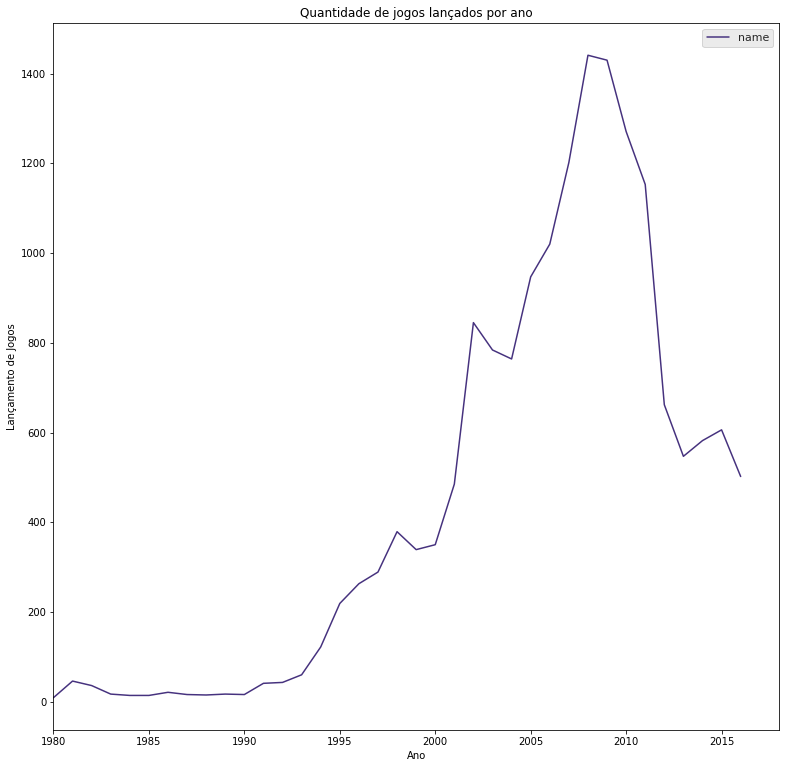

In [74]:
#Plotando o gráfico
fig, ax = plt.subplots(figsize=[13,13])
sns.set_theme(style="whitegrid", palette="viridis")
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.lineplot(data = qtde, ax=ax)
sns.axes_style()

ax.set_xlim(1980,2018)
ax.set(title="Quantidade de jogos lançados por ano")
ax.set_xlabel("Ano")
ax.set_ylabel("Lançamento de Jogos")

Pelo gráfico, é possivel verificar o comportamento do mercado de jogos ao longo do período de 1980 a 2017. De 1990 até 2005 há um crescimento surpreendente com alguns picos (provavelmente o lançamento de algum jogo/console), principalmente a partir dos anos 2000, onde é possivel verificar um linha com crescimento muito acentuado. Consultando sites especializados em games e consoles, foi a partir dos anos 2000 que empresas como Sony, Nintendo e Microsoft lançaram seus principais e mais vendidos consoles. 

Esse crescimento surpreendente durou até por volta de 2007/2008, quando as vendas só cairam. Esse inicio de queda nas vendas, proavelmente esteja ligada a crise americana que se iniciou justamente nessa época. Essa queda também pode ter ligação com o início da popularização dos jogos online.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente
</div>

### Total de vendas anuais de cada plataforma 

In [75]:
#Criando um noo conjunto de dados, agrupado por plataforma e a sma das vendas totais agregadas
platform = games.groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False)
display(platform)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


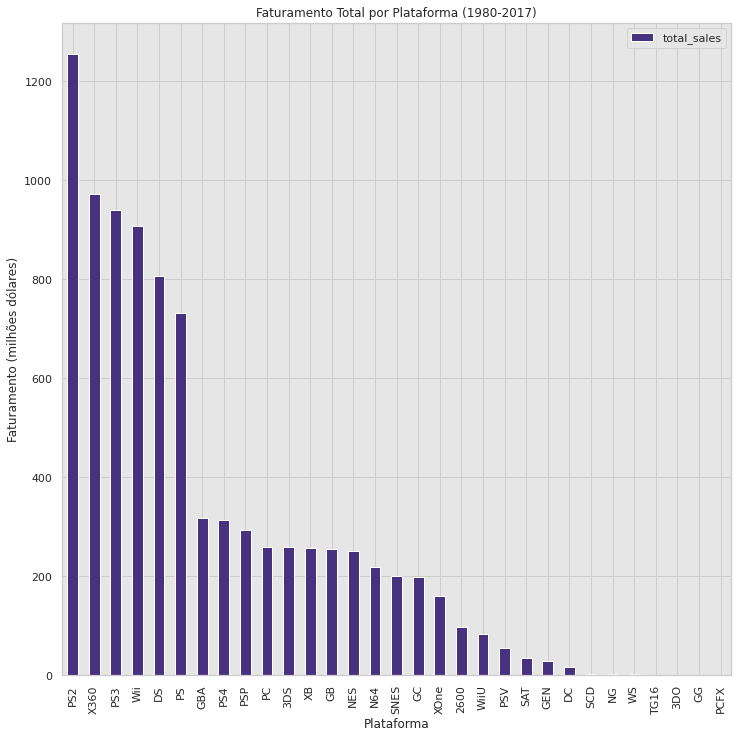

In [76]:
#Plotando o gráfico
platform.plot(kind = 'bar',figsize=[12,12],title="Faturamento Total por Plataforma (1980-2017)",grid=True,xlim=1980,xlabel='Plataforma',ylabel='Faturamento (milhões dólares)')
plt.show()

Pelo gráfico acima, verifica-se que a plataforma PS2 da fabricante Sony é disparado o console mais vendido de todos os tempos, com um faturamento total 23% maior do que o segundo colocado. Para a análise do item seguinte, será considerado as TOP5 a partir deste gráfico, que são:  <b> PS2, X360, PS3, Wii e DS.  


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bacana!
</div>

### Análise dos TOP5

#### PS2

In [77]:
#Distribuição de vendas da plataforma ao longo dos anos
ps2 = games[games['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum()
ps2 = ps2.to_frame().reset_index()
ps2 = ps2.loc[ps2['year_of_release']>0]
ps2.insert(2, 'Platform', 'PS2')
display(ps2)

,year_of_release,total_sales,Platform
1,2000,39.17,PS2
2,2001,166.43,PS2
3,2002,208.36,PS2
4,2003,193.05,PS2
5,2004,211.81,PS2
6,2005,160.66,PS2
7,2006,104.24,PS2
8,2007,76.10,PS2
9,2008,53.90,PS2
10,2009,26.40,PS2


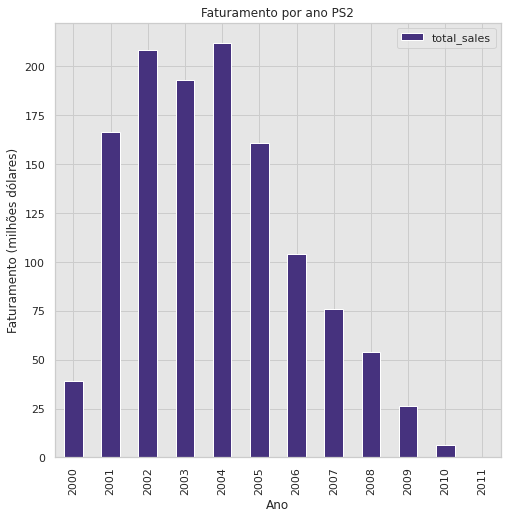

In [78]:
#Plotando o gráfico
ab = ps2.plot.bar(x='year_of_release', y='total_sales',figsize=[8,8], title="Faturamento por ano PS2",grid=True,xlim=1980,xlabel='Ano',ylabel='Faturamento (milhões dólares)',rot=0)
ab.set_xticklabels(ab.get_xticklabels(), rotation=90)
plt.show()

Verifica-se pelo gráfico o tamanho sucesso da plataforma PS2. Com seu lançamento em 2000, haviam poucos jogos do gênero Sport/Aventura, fato que mudou em 2001, com o lançamento do game GTA (gênero Sport). Juntando a isso a popolarização do console, as vendas em 2001 mais que triplicaram ,com um crescimento de 325% em relação a 2000. Esse crescimentos se seguiu até 2004, tendo um queda em 2003, com recuperação no ano seguinte. A partir de 2005 as vendas da plataforma desaceleraram, caindo em média 30% ao ano, muito provavelmente influenciada pelo surgimento de novas plataformas (mais tecnológicas) até chegar em 2011, com números inexpressivos. 

#### XBox 360

In [79]:
#Distribuição de vendas da plataforma ao longo dos anos
x360 = games[games['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum()
x360 = x360.to_frame().reset_index()
x360 = x360.loc[x360['year_of_release']>0]
x360.insert(2, 'Platform', 'X360')
display(x360)

,year_of_release,total_sales,Platform
1,2005,9.22,X360
2,2006,51.79,X360
3,2007,95.41,X360
4,2008,136.07,X360
5,2009,120.82,X360
6,2010,170.55,X360
7,2011,145.23,X360
8,2012,100.72,X360
9,2013,88.58,X360
10,2014,34.74,X360


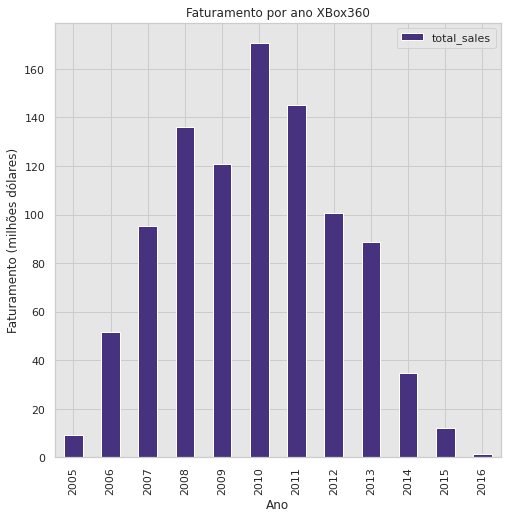

In [80]:
#Plotando o gráfico
ac = x360.plot.bar(x='year_of_release', y='total_sales',figsize=[8,8], title="Faturamento por ano XBox360",grid=True,xlim=1980,xlabel='Ano',ylabel='Faturamento (milhões dólares)',rot=0)
ac.set_xticklabels(ac.get_xticklabels(), rotation=90)
plt.show()

A ascensão do console Xbox360 da Microsoft tem inicio justamente no ano de queda nas vendas do PS2 (2005/2006). Em 2007 teve um crescimento de 86% comparado a 2006. Esse crescimento alcançou o ápice em 2010, registrando 88% de crescimento em relação a 2009. A partir de 2011 as vendas da plataforma começaram a desacelerar, tendo a queda mais acentuada em 2014 (61% comparado ao ano anterior), também provavelmente influenciada pelo surgimento de novas plataformas (mais tecnológicas) até chegar em 2016, com números inexpressivos.

#### PS3

In [81]:
#Distribuição de vendas da plataforma ao longo dos anos
ps3 = games[games['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum()
ps3 = ps3.to_frame().reset_index()
ps3 = ps3.loc[ps3['year_of_release']>0]
ps3.insert(2, 'Platform', 'PS3')
display(ps3)

,year_of_release,total_sales,Platform
1,2005,0.19,PS3
2,2006,21.44,PS3
3,2007,73.19,PS3
4,2008,118.79,PS3
5,2009,130.93,PS3
6,2010,142.96,PS3
7,2011,157.98,PS3
8,2012,108.28,PS3
9,2013,113.25,PS3
10,2014,47.76,PS3


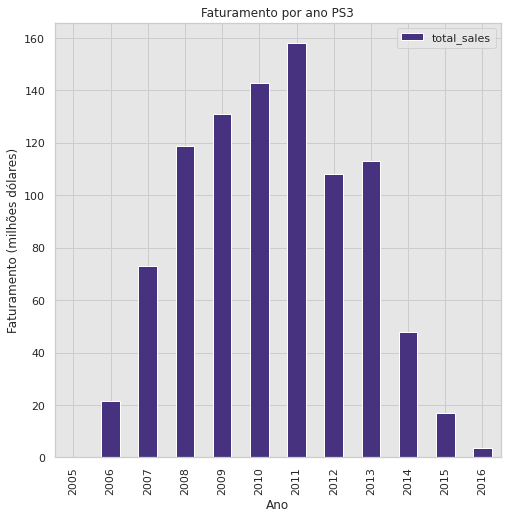

In [82]:
#Plotando o gráfico
ad = ps3.plot.bar(x='year_of_release', y='total_sales',figsize=[8,8], title="Faturamento por ano PS3",grid=True,xlim=1980,xlabel='Ano',ylabel='Faturamento (milhões dólares)',rot=0)
ad.set_xticklabels(ad.get_xticklabels(), rotation=90)
plt.show()

Pelo gráfico, percebe-se que  PS3 (mais uma plataforma da Sony)tem suas vendas iniciadas em 2006, alcançando um crescimento de quse 250% já em 2007. O sucesso da plataforma continuou em crescimento até 2011, crescendo em média 10% ao ano. A parti de 2012 as vendas começam a cair, tendo uma leve recuperação em 2013, vindo a cair acentuadamente em 2014 (58%). Ainda em 2016 a plataforma apresenta algumas vendas.

#### Wii

In [83]:
#Distribuição de vendas da plataforma ao longo dos anos
wii = games[games['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum()
wii = wii.to_frame().reset_index()
wii = wii.loc[wii['year_of_release'] > 0]
wii.insert(2, 'Platform', 'WII')
display(wii)

,year_of_release,total_sales,Platform
1,2006,140.19,WII
2,2007,153.41,WII
3,2008,177.68,WII
4,2009,206.97,WII
5,2010,128.67,WII
6,2011,59.79,WII
7,2012,22.94,WII
8,2013,8.59,WII
9,2014,3.75,WII
10,2015,1.14,WII


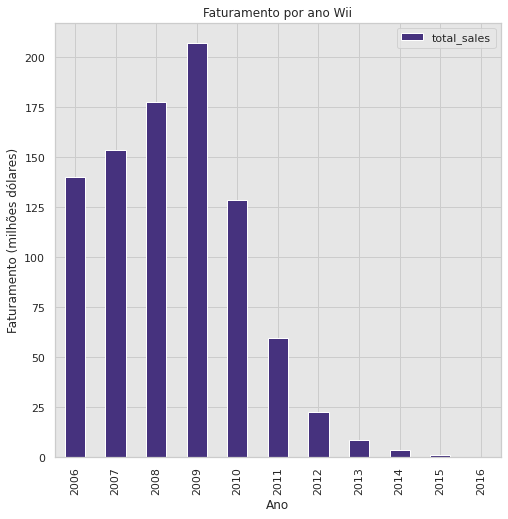

In [84]:
#Plotando o gráfico
ae = wii.plot.bar(x='year_of_release', y='total_sales',figsize=[8,8], title="Faturamento por ano Wii",grid=True,xlim=1980,xlabel='Ano',ylabel='Faturamento (milhões dólares)',rot=0)
ae.set_xticklabels(ae.get_xticklabels(), rotation=90)
plt.show()

Nota-se pelo gráfico que o Wii(de propriedade da Nintendo) que a plataforma teve um enorme sucesso já em seu lançamento (2006) pois inaugurou uma nova jogabilidade e tecnologia além de jogos proprietários de extrema popularidade. O sucesso continuou até 2009, crescendo em média 15%. A partir de 2010 as vendas começaram a cair até 2013/2014, no lançamento do seu sucessor (WiiU)

#### DS

In [85]:
#Distribuição de vendas da plataforma ao longo dos anos
ds = games[games['platform'] == 'DS'].groupby('year_of_release')['total_sales'].sum()
ds = ds.to_frame().reset_index()
ds = ds.loc[ds['year_of_release']>0]
ds.insert(2, 'Platform', 'DS')
ds

,year_of_release,total_sales,Platform
1,1985,0.02,DS
2,2004,17.27,DS
3,2005,130.14,DS
4,2006,119.81,DS
5,2007,147.23,DS
6,2008,145.36,DS
7,2009,119.56,DS
8,2010,85.35,DS
9,2011,26.33,DS
10,2012,11.67,DS


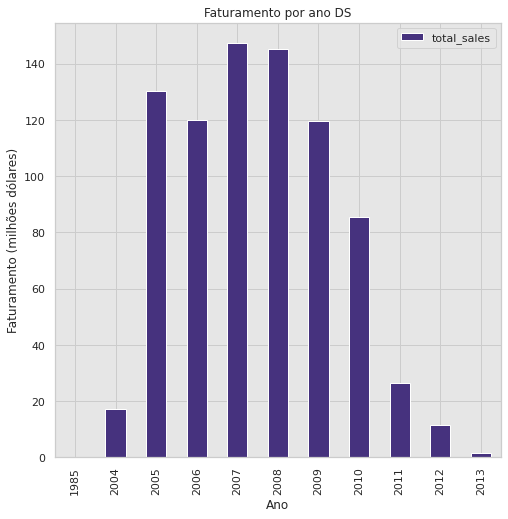

In [86]:
#Plotando o gráfico
af = ds.plot.bar(x='year_of_release', y='total_sales',figsize=[8,8], title="Faturamento por ano DS",grid=True,xlim=1980,xlabel='Ano',ylabel='Faturamento (milhões dólares)',rot=0)
af.set_xticklabels(af.get_xticklabels(), rotation=90)
plt.show()

Mais uma plataforma da fabricante Nintendo. Analisando o gráfico, nota-se um enorme sucesso do console da fabricante no ano seguinte ao seu lançamento, alcançando um crescimento de mais de 600% em relação ao ano do lançamento. O sucesso se deve ao fato de ser um console portátil e com tecnologia avançada para a época. O sucesso se manteve pelos 4 anos seguintes, tendo uma pequena queda em 2006, mas alcançando o ápice em 2007. A partir de 2009, com o surgimento de novas plataformas e novos jogos, as vendas começaram a cair, até que foi descontinuado em 2013.


<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Gostei muito das análises.

Uma sugestão é colocar isso dentro de uma função já que repetiu algumas vezes.
</div>

#### Agrupando os conjuntos de dados das plataformas TOP5

In [87]:
#Criando um único dataframe, ordenando e ajustando o index
df = [ps2, x360, ps3, wii, ds]
top5 = pd.concat(df)
top5 = top5.sort_values(by=['year_of_release'],ascending=True).reset_index().drop(['index'], axis=1)

In [88]:
#Filtrand valores indesejados
top5 = top5.loc[top5['year_of_release'] > 1989]

In [89]:
#Amostra do conjunto de dados
top5.head()

,year_of_release,total_sales,Platform
1,2000,39.17,PS2
2,2001,166.43,PS2
3,2002,208.36,PS2
4,2003,193.05,PS2
5,2004,211.81,PS2


[Text(0.5, 1.0, 'Total de Vendas anuais por plataforma')]

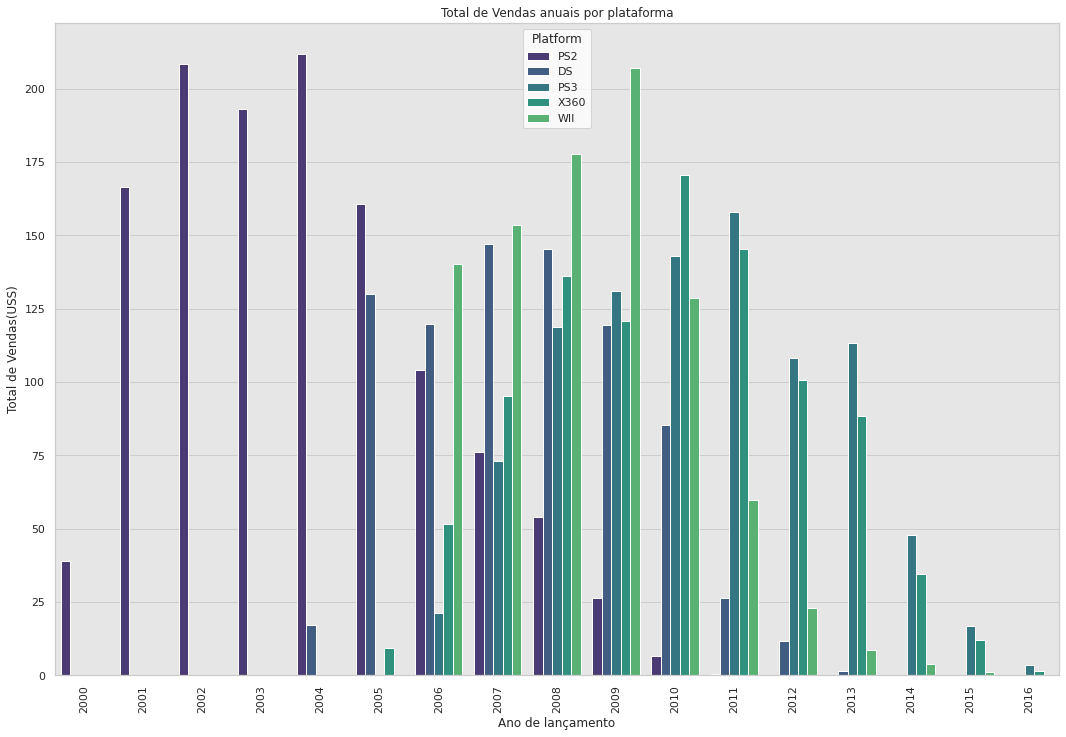

In [90]:
#Plotando gráfico com as informações das plataformas TOP5 em vendas
fig,ag = plt.subplots(figsize=(18,12))
sns.set_theme(style="whitegrid", palette="viridis")
sns.set_style("whitegrid", {"axes.facecolor": "1"})
sns.axes_style()
ag.set_xlim(1985,2017)
ag = sns.barplot(x='year_of_release', y='total_sales', hue='Platform', data=top5)
ag.set_xticklabels(ag.get_xticklabels(), rotation=90)
ag.set(xlabel='Ano de lançamento', ylabel='Total de Vendas(USS)')
ag.set(title="Total de Vendas anuais por plataforma")

###### Observações

Pelas análises prévias e gráficos gerados das plataformas TOP5 em receita ao longo dos anos 2000 a 2016, percebe-se que:

   - uma plataforma tem, em média, uma vida útil de 9 a 10 anos no mercado.
   - em média, uma plataforma atinge seu ápice de vendas em 4 a 5 anos após seu lançamento
   - após 5 anos, todas as plataformas apresentam queda nas vendas, que se perduram até sua descontinuação
   - nota-se uma certa simetria inversa entre as plataformas da mesma fabricante (PS2 e PS3 da Sony e Wii e DS da Nintendo), ou seja, comparando plataformas do mesmo fabricante, percebe-se que enquanto uma plataforma está em inicio de ascensão nas vendas, a outra começa a apresentar quedas. Esse comportamento talvez seja por consumidores já fiéis à fabricante, ou seja, que já estão habituados com a jogabilidade/tecnologia da marca, que acabam optando pela plataforma que está sendo lançada.
   - comparando plataformas do mesmo fabricante, nota-se um hiato de cerca de 2 a 3 anos entre o início de queda nas vendas de uma plataforma e o primeiro ano de vendas da nova plataforma (vide PS e PS3). Isso reforça o ponto exposto acima, ou seja, se um consumidor que comprou um PS2 em 2004 (auge do sucesso da plataforma) e ficou satisfeito com a jogabilidade/tecnologia da marca, talvez esse mesmo consumidor esteja disposto a esperar até 2007 (inicio das vendas expressivas do PS3) pela nova plataforma da mesma fabricante, mesmo que, durante esse período, plataformas como Xbox360 e Wii tenham sido lançados.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito, acredito ser a melhor forma de mostrar os dados para essa análise.

Concordo com as conclusões.
</div>

### Construindo um modelo para 2017

Com base no exposto no tópico anterior, os dados serão filtrados tendo por objetivo localizar uma plataforma que esteja no inicio de sua ascensão de vendas. Será considerado o ano de 2014 como referência para construção do modelo.

In [91]:
# Selecionar do conjunto de dados competo os dados mais recentes (próximos a 2017)
games_new = games.loc[games['year_of_release'] > 2014].reset_index().drop(['index'],axis=1)

In [92]:
#Amostra do conjunto de dados
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
2,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5,E
4,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN


Um ponto interessante a ser analisado aqui é verificar as vendas totais de jogos com o conjunto de dados filtrado a partir de 2014.

In [93]:
# Criando um novo dataframe agrupado por nome com a soma total de vendas
games_new_play = games_new.groupby(['name','genre']).agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False).reset_index().head(15)

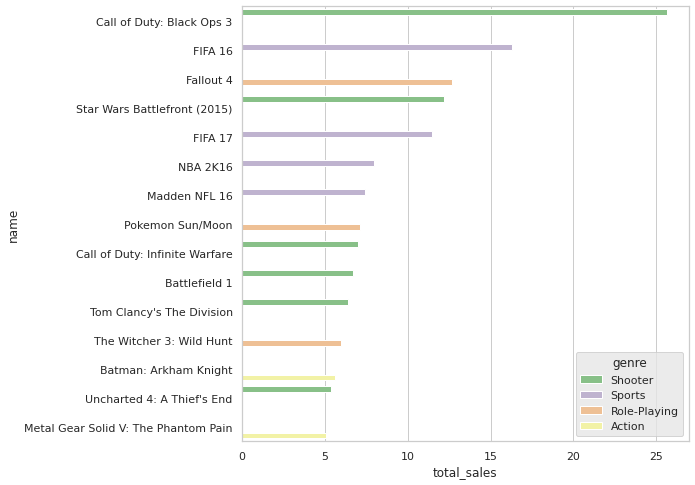

In [94]:
#Plotando o gráfico
fig,ag = plt.subplots(figsize=(8,8))
sns.set_theme(style="whitegrid", palette="Accent")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.axes_style()
#ag.set_xlim(5,30)
ag = sns.barplot(x = 'total_sales', y='name', hue='genre', data=games_new_play.sort_values(by='total_sales',ascending=False).head(15))

Conforme visto pelo conjunto de dados filtrado e pelo gráfico, nota-se que o jogo Call of Duty: Black Ops 3 ficou em primeiro lugar em vendas, superando em cerca de 56% o segundo lugar, o jogo Fifa 16.  Já em terceiro lugar ficou o jogo Fallout 4. Interessante notar que nos 15 primeiros da lista, 6 são do gênero Shooter 4 são do gênero Sport

In [95]:
# Criando um novo dataframe agrupado por plataforma com a soma total de vendas
games_new.groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False).head(10)

,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


Após filtrado as plataformas a partir de 2014, agrupado e agregado a soma das vendas totais, temos as plataformas com possivel potencial de crescimento.

#### Analisando as plataformas com potencial de crescimento

Após filtros e agrupamentos realizados, chegou-se em um conjunto de 10 plataformas com ano acima de 2014. Porém optou-se por desconsiderar as 2 últimas por dois motivos:
   - vendas inexpressivas (abaixo de USS10M)
   - produtos possivelmente descontinuados ou substituidos

In [96]:
#Filtro vendas globais para cada jogo dividido por plataformas (TOP10 plataformas)
games_plat = games_new.groupby(['platform']).agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False).reset_index().head(10)

In [97]:
#Ordenando  conjunto de dados
games_plat.sort_values(by='total_sales',ascending=False).head(8)

,platform,total_sales
0,PS4,188.15
1,XOne,86.29
2,3DS,42.92
3,WiiU,20.95
4,PS3,20.42
5,PC,13.77
6,X360,13.48
7,PSV,10.50


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

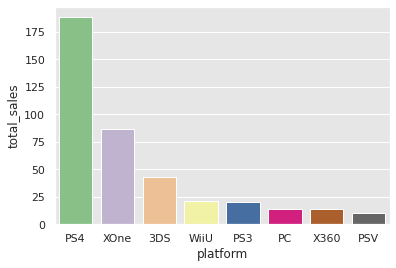

In [98]:
#Plotando boxplot com outliers
sns.barplot(x = 'platform', y='total_sales', data=(games_plat.sort_values(by='total_sales',ascending=False).head(8)))

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

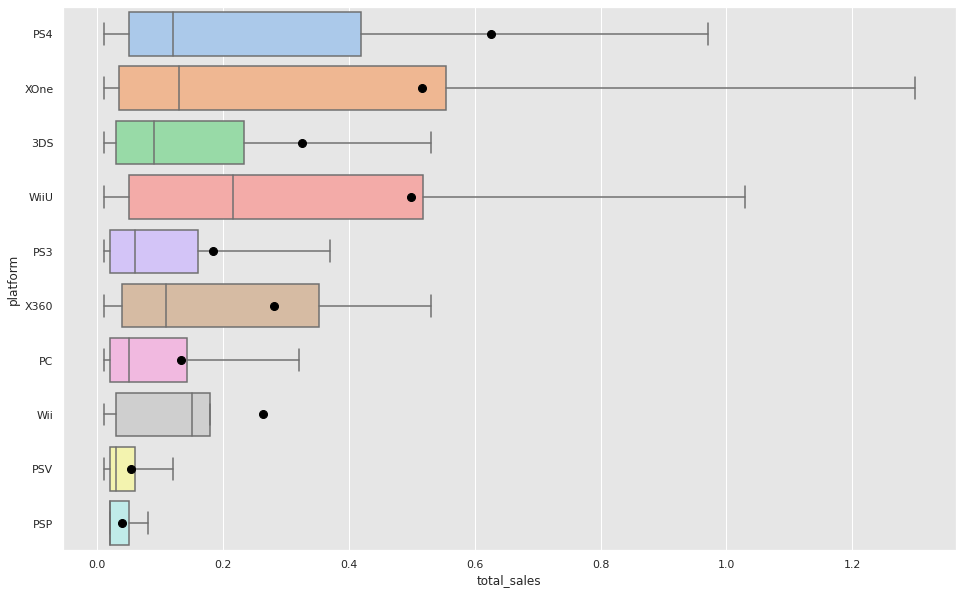

In [99]:
#Plotando boxplot sem outliers
fig,bb = plt.subplots(figsize=(16,10))
sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(x='total_sales', y='platform',fliersize=3, showfliers = False,showmeans=True,meanprops={'marker':'o','markerfacecolor':'black',
                 'markeredgecolor':'black','markersize':'8'}, data=games_new.sort_values(by='total_sales',ascending=False))

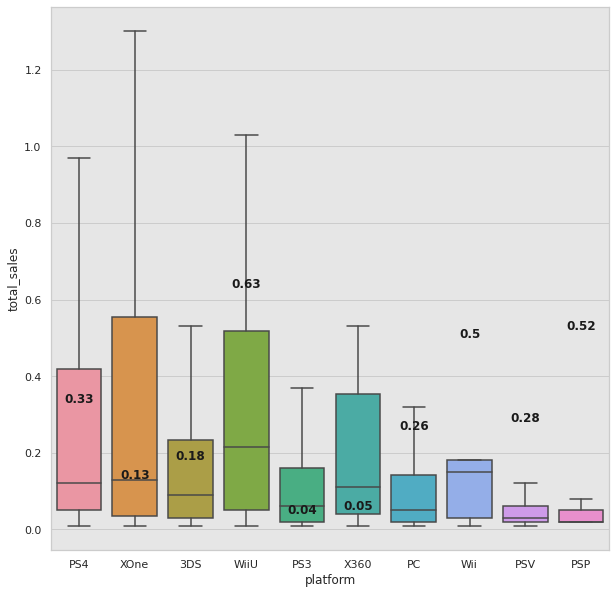

In [100]:
#Plotando boxplot sem outliers com as medias 
sns.set(rc={"figure.figsize":(10, 10)})
sns.set_theme(style="whitegrid", palette="viridis")
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
box_plot = sns.boxplot(data=games_new.sort_values(by='total_sales',ascending=False), x='platform', y='total_sales',showfliers = False)


medians = games_new.groupby(['platform'])['total_sales'].mean().round(2)
vertical_offset = games_new['total_sales'].mean() * 0.005

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='k',weight='semibold')
plt.show()

Pelos boxplots gerados, podemos tirar algumas conclusões:

   - boa parte tem simetria positiva
   - as plataformas XOne e WiiU possuem a maior quantidade de dados na região dos 50% (IQT)
   - a plataforma XOne te a maior variabilidade nos dados
   - no boxplot horizontal, os pontos pretos são as médias de cada boxplot. As plataformas XOne e WiiU têm suas médias na região dos 50% dos dados.
   - o gráfico com boxplot plotado verticalmente, verifica-se as médias de cada plataforma. Nota-se com isso, a influência dos outliers no gráfico (horiontal = sem outliers e vertical = com outliers)
        


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Muito legal!
</div>

### Analisando a influência das avaliações no total de vendas de um Jogo 

Um ponto interessante a ser analisado é se as avaliações influenciam nas vendas de jogos e quais gêneros. 

#### Analisando a coluna 'critic_score'

In [101]:
#Criando novo dataframe filtrando a base de dados TOP8 ('games_new')
critic = games_new.loc[games_new['critic_score'].notnull()]

In [102]:
#Amostra do conjunto de dados
critic.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5,E
5,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87.0,6.5,M
7,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,5.39,93.0,7.9,T
8,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,4.62,86.0,8.1,T


In [103]:
#Filtrando por jogo, gênero, avaliação dos críticos e total de vendas
critic.pivot_table(index = ['name', 'genre'], values = ['total_sales','critic_score'], aggfunc = {'total_sales':np.sum, 'critic_score':np.mean}).sort_values(by=[('critic_score')],ascending=False).head(10)                     

,,critic_score,total_sales
name,genre,,
Grand Theft Auto V,Action,96.0,1.17
The Elder Scrolls V: Skyrim,Role-Playing,94.0,2.07
Metal Gear Solid V: The Phantom Pain,Action,93.8,5.06
Uncharted 4: A Thief's End,Shooter,93.0,5.39
God of War III,Action,92.0,0.64
Bloodborne,Action,92.0,2.48
The Witcher 3: Wild Hunt,Role-Playing,92.0,5.99
Xenoblade Chronicles,Role-Playing,92.0,0.57
Forza Horizon 3,Racing,91.0,1.08


In [104]:
#Filtrando por jogo, gênero, avaliação dos críticos e total de vendas
critic.pivot_table(index = ['name', 'genre'], values = ['total_sales','critic_score'], aggfunc = {'total_sales':np.sum, 'critic_score':np.mean}).sort_values(by=[('total_sales')],ascending=False).head(10)

,,critic_score,total_sales
name,genre,,
FIFA 16,Sports,83.000000,16.30
Fallout 4,Role-Playing,86.333333,12.67
FIFA 17,Sports,84.200000,11.48
NBA 2K16,Sports,86.200000,7.98
Madden NFL 16,Sports,83.750000,7.40
Call of Duty: Infinite Warfare,Shooter,76.000000,7.02
Battlefield 1,Shooter,87.666667,6.70
Tom Clancy's The Division,Shooter,79.666667,6.38
The Witcher 3: Wild Hunt,Role-Playing,92.000000,5.99


[Text(0.5, 1.0, 'Melhores Jogos pelo Critic Score')]

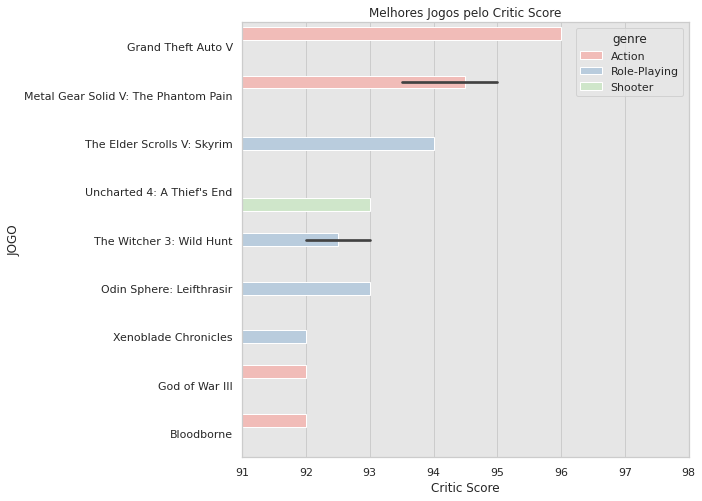

In [105]:
fig,xx = plt.subplots(figsize=(8,8))
sns.set_theme(style="whitegrid", palette="Pastel1")
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.axes_style()

xx.set_xlim(91,98)
xx = sns.barplot(x='critic_score',hue = 'genre', y='name',data=critic.sort_values('critic_score',ascending=False).head(15))
xx.set(xlabel='Critic Score', ylabel='JOGO')
xx.set(title="Melhores Jogos pelo Critic Score")

De acordo com os dados expostos nos filtros realizados, alguns pontos a serem observados:
   - nos dois filtros realizados (o primeiro organizado pela média da coluna 'critic_score' e o segundo orgranizado pela soma da coluna 'total_score') temos dois conjuntos de dados completamente diferentes no quesito jogo, ou seja, o jogo mais vendido (FIFA 16) não tem a melhor pontuação (83) enquanto o jogo mais bem pontuado (GTA V) não está nem entre os dez que mais venderam.
   - em relação ao gênero, dos TOP10 nas maiores pontuações, 4 são RPG e 4 são Sports e somente 1 é do gênero Shooter. Já no TOP10 mais vendidos, somente 2 são RPG, 4 são Sports e 3 são Shooter
   
Portanto não é possivel afirmar que há indícios da influência da classificação dos especialistas nas vendas de um jogo ou mesmo no gênero.


<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Gostei muito da visualização e da sua conclusão, mas a correlação entre as duas medidas ajudaria a provar o seu ponto aqui!
</div>

#### Analisando a coluna 'user_score'

In [106]:
games_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1108 non-null   object 
 1   platform         1108 non-null   object 
 2   year_of_release  1108 non-null   int64  
 3   genre            1108 non-null   object 
 4   na_sales         1108 non-null   float64
 5   eu_sales         1108 non-null   float64
 6   jp_sales         1108 non-null   float64
 7   other_sales      1108 non-null   float64
 8   total_sales      1108 non-null   float64
 9   critic_score     603 non-null    float64
 10  user_score       674 non-null    object 
 11  rating           648 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 104.0+ KB


In [107]:
#Criando novo dataframe filtrando a base de dados ('games_new')
user_notnull = games_new.loc[games_new['user_score'].notnull()]

In [108]:
#Amostra do conjunto de dados
user_notnull.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5,E
5,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87.0,6.5,M
7,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,5.39,93.0,7.9,T
8,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,4.62,86.0,8.1,T


In [109]:
user_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 1 to 1098
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             674 non-null    object 
 1   platform         674 non-null    object 
 2   year_of_release  674 non-null    int64  
 3   genre            674 non-null    object 
 4   na_sales         674 non-null    float64
 5   eu_sales         674 non-null    float64
 6   jp_sales         674 non-null    float64
 7   other_sales      674 non-null    float64
 8   total_sales      674 non-null    float64
 9   critic_score     602 non-null    float64
 10  user_score       674 non-null    object 
 11  rating           643 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 68.5+ KB


In [110]:
#Filtrando as linhas sem "tbd"
user = user_notnull.loc[user_notnull['user_score'] != 'tbd'].copy()

In [111]:
#Amostra do conjunto de dados
user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5,E
5,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87.0,6.5,M
7,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,5.39,93.0,7.9,T
8,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,4.62,86.0,8.1,T


In [112]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 1096
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             600 non-null    object 
 1   platform         600 non-null    object 
 2   year_of_release  600 non-null    int64  
 3   genre            600 non-null    object 
 4   na_sales         600 non-null    float64
 5   eu_sales         600 non-null    float64
 6   jp_sales         600 non-null    float64
 7   other_sales      600 non-null    float64
 8   total_sales      600 non-null    float64
 9   critic_score     570 non-null    float64
 10  user_score       600 non-null    object 
 11  rating           577 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 60.9+ KB


In [113]:
#Alterando o tipo de dado
user['user_score'] = (user['user_score']).astype(float)

In [114]:
#Amostra do conjunto de dados
user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5.0,E
5,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87.0,6.5,M
7,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,5.39,93.0,7.9,T
8,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,4.62,86.0,8.1,T


In [115]:
#Informações gerais
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 1096
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             600 non-null    object 
 1   platform         600 non-null    object 
 2   year_of_release  600 non-null    int64  
 3   genre            600 non-null    object 
 4   na_sales         600 non-null    float64
 5   eu_sales         600 non-null    float64
 6   jp_sales         600 non-null    float64
 7   other_sales      600 non-null    float64
 8   total_sales      600 non-null    float64
 9   critic_score     570 non-null    float64
 10  user_score       600 non-null    float64
 11  rating           577 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 60.9+ KB


In [116]:
#Filtrando por jogo, gênero, avaliação dos críticos e total de vendas
user.pivot_table(index = ['name', 'genre'], values = ['total_sales','user_score'],  aggfunc = {'total_sales':np.sum, 'user_score':np.mean}).sort_values(by=[('user_score')],ascending=False).head(10)

,,total_sales,user_score
name,genre,,
The Witcher 3: Wild Hunt,Role-Playing,5.99,9.233333
The Legend of Zelda: Majora's Mask 3D,Action,2.34,9.000000
Xenoblade Chronicles X,Role-Playing,0.84,8.900000
Xenoblade Chronicles,Role-Playing,0.57,8.900000
Cities: Skylines,Simulation,0.14,8.900000
Shin Megami Tensei: Devil Survivor 2,Role-Playing,0.11,8.800000
Dragon Quest VIII: Journey of the Cursed King,Role-Playing,0.86,8.800000
Pokemon Super Mystery Dungeon,Role-Playing,1.25,8.800000
Brothers: A Tale of Two Sons,Adventure,0.17,8.750000


In [117]:
#Criando um novo dataframe agrupado por gênero e ano e a contagem total de vendas
user.pivot_table(index = ['name','genre'], values = ['total_sales','user_score'],  aggfunc = {'total_sales':np.sum, 'user_score':np.mean}).sort_values(by=[('total_sales')],ascending=False).head(10)

,,total_sales,user_score
name,genre,,
FIFA 16,Sports,16.30,3.840000
Fallout 4,Role-Playing,12.67,6.033333
FIFA 17,Sports,11.48,3.940000
NBA 2K16,Sports,7.98,5.280000
Madden NFL 16,Sports,7.40,5.050000
Call of Duty: Infinite Warfare,Shooter,7.02,3.166667
Battlefield 1,Shooter,6.70,8.066667
Tom Clancy's The Division,Shooter,6.38,6.566667
The Witcher 3: Wild Hunt,Role-Playing,5.99,9.233333


[Text(0.5, 1.0, 'Melhores Jogos pelo User Score')]

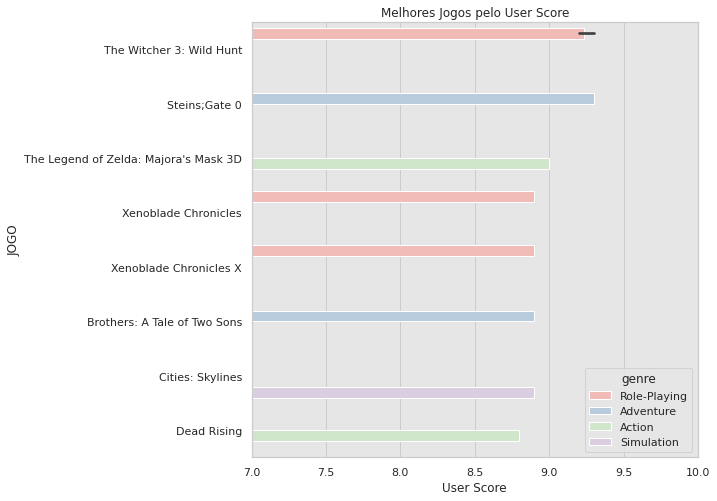

In [118]:
fig,xx = plt.subplots(figsize=(8,8))
sns.set_theme(style="whitegrid", palette="Pastel1")
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.axes_style()

xx.set_xlim(7,10)
xx = sns.barplot(x='user_score',hue = 'genre', y='name',data=user.sort_values('user_score',ascending=False).head(10))
xx.set(xlabel='User Score', ylabel='JOGO')
xx.set(title="Melhores Jogos pelo User Score")

De acordo com os dados expostos nos filtros realizados, alguns pontos a serem observados:
   - nos dois filtros realizados (o primeiro organizado pela média da coluna 'user_score' e o segundo orgranizado pela soma da coluna 'total_score') temos dois conjuntos de dados completamente diferentes no quesito jogo, ou seja, o jogo mais vendido (FIFA 16) não tem a melhor pontuação (83) enquanto o jogo mais bem pontuado (The Witcher 3: Wild Hunt) não está nem entre os dez que mais venderam.
   - em relação ao gênero, dos TOP10 nas maiores pontuações, 6 são RPG e 2 são Sports. Já no TOP10 mais vendidos, somente 2 são RPG, 4 são Sports e 3 são Shooter
   
Portanto, conforme anterior, também não é possivel afirmar que há indícios da influência da classificação dos usuários nas vendas de um jogo ou mesmo no gênero.


<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Idem
</div>

### Analisando a influência das avaliações no total de vendas de uma Plataforma

#### Analisando a coluna 'critic_score'

In [119]:
#Amostra do conjunto de dados
games_new.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
2,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5,E
4,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN
5,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87.0,6.5,M
6,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,7.14,NaN,NaN,NaN
7,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,5.39,93.0,7.9,T
8,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,4.62,86.0,8.1,T
9,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,4.49,84.0,6.4,T


In [120]:
#Criando um novo dataframe agrupado por gênero e ano e a contagem total de vendas
critic.pivot_table(index = ['platform','genre'], values = ['total_sales','critic_score'], aggfunc = {'total_sales':np.sum, 'critic_score':np.mean}).sort_values(by=[('critic_score')],ascending=False).head(10)

critic_score  total_sales
platform genre                                  
PS4      Puzzle                88.0         0.02
XOne     Strategy              87.0         0.04
         Role-Playing          84.0         8.41
3DS      Platform              83.0         0.40
PC       Role-Playing          82.0         2.53
3DS      Adventure             81.0         0.08
PS3      Shooter               80.0         0.77
         Platform              80.0         0.11
X360     Shooter               80.0         0.64
WiiU     Role-Playing          79.5         1.26

In [121]:
#dataframe agrupado por gênero e ano e a contagem total de vendas
critic.pivot_table(index = ['platform','genre'], values = ['total_sales','critic_score'], aggfunc = {'total_sales':np.sum, 'critic_score':np.mean}).sort_values(by=[('total_sales')],ascending=False).head(10)

critic_score  total_sales
platform genre                                  
PS4      Action           72.366197        41.84
         Sports           66.653846        34.29
         Shooter          74.038462        32.77
XOne     Shooter          76.857143        23.66
PS4      Role-Playing     74.280000        17.91
XOne     Sports           69.136364        15.72
         Action           72.208333        12.77
         Role-Playing     84.000000         8.41
PS4      Fighting         72.750000         7.18
PS3      Sports           70.705882         7.05

[Text(0.5, 1.0, 'Melhores Plataformas pela Critic Score')]

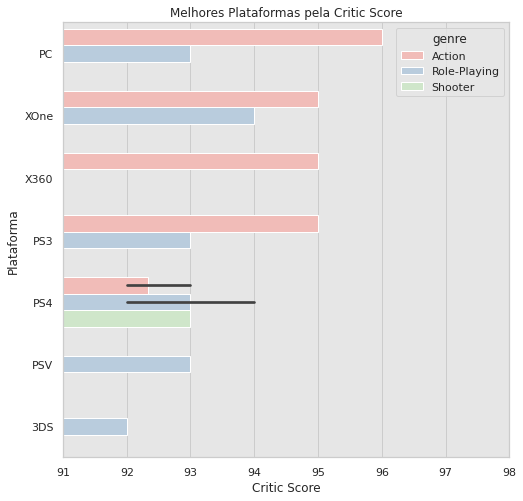

In [122]:
fig,xx = plt.subplots(figsize=(8,8))
sns.set_theme(style="whitegrid", palette="Pastel1")
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.axes_style()

xx.set_xlim(91,98)
xx = sns.barplot(x='critic_score',hue = 'genre', y='platform',data=critic.sort_values('critic_score',ascending=False).head(15))
xx.set(xlabel='Critic Score', ylabel='Plataforma')
xx.set(title="Melhores Plataformas pela Critic Score")

##### Verificando a correlação entre avaliações e vendas

In [123]:
#Verificando os dados de criti_Score na plataforma (Plataforma escolhida = PS4)
critic_score_ps4 = critic.loc[(critic['platform'] == 'PS4')]

In [124]:
#Amostra do conjunto de dados
critic_score_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5,E
5,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87.0,6.5,M
7,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,5.39,93.0,7.9,T
8,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,4.62,86.0,8.1,T


[Text(0.5, 0, 'Avaliação Críticos'), Text(0, 0.5, 'Total de Vendas(USS)')]

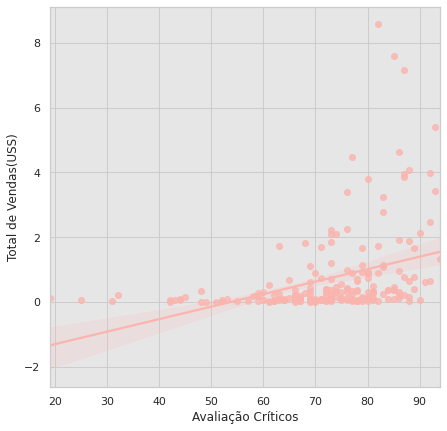

In [125]:
# Gráfico scatterplot  partir dos filtros acima
fig,sa = plt.subplots(figsize=(7,7))
sns.set_theme(style="whitegrid", palette="viridis")
sns.set_style("whitegrid", {"axes.facecolor": "1"})
sa = sns.regplot(x='critic_score', y='total_sales', data=critic_score_ps4)
sa.set(xlabel='Avaliação Críticos', ylabel='Total de Vendas(USS)')

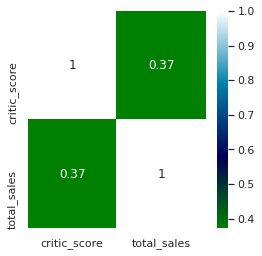

In [126]:
#Plotando o gráfico de correlação
critic_score_corr = critic_score_ps4[['critic_score','total_sales']]
corr = critic_score_corr.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, cmap="ocean",annot=True)
plt.show()

De acordo com os conjuntos de dados filtrados é possivel inferir que há indícios de influência entre as notas dos críticos e as vendas das plataformas. Percebe-se isso no TOP10 de ambas as plataformas (PS4 e XOne). Mais uma vez não é possivel inferir qualquer relação com o gênero do jogo. 
Pelo gráfico de dispersão entre 'total_sales' x 'critic_score' nota-se uma inclinação positiva da reta, ou seja, há uma correlação de força fraça diretamente proporcional, verificada pelo valor calculado na matrix de correlação (0.37).


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Legal demais! Era nisso que estava pensando!

Pra ser honesto isso é ainda melhor do que estava esperando. Sensacional!
</div>

#### Analisando a coluna 'user_score'

In [127]:
#Amostra do conjunto de dados
user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5.0,E
5,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87.0,6.5,M
7,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,5.39,93.0,7.9,T
8,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,4.62,86.0,8.1,T


In [128]:
#Informações gerais
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 1096
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             600 non-null    object 
 1   platform         600 non-null    object 
 2   year_of_release  600 non-null    int64  
 3   genre            600 non-null    object 
 4   na_sales         600 non-null    float64
 5   eu_sales         600 non-null    float64
 6   jp_sales         600 non-null    float64
 7   other_sales      600 non-null    float64
 8   total_sales      600 non-null    float64
 9   critic_score     570 non-null    float64
 10  user_score       600 non-null    float64
 11  rating           577 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 60.9+ KB


In [129]:
#dataframe agrupado por gênero e ano e a contagem total de vendas
user.pivot_table(index = ['platform','genre'], values = ['total_sales','user_score'], aggfunc = {'total_sales':np.sum, 'user_score':np.mean}).sort_values(by=[('user_score')],ascending=False).head(10)

,,total_sales,user_score
platform,genre,,
PSV,Sports,0.01,8.800000
3DS,Adventure,0.08,8.500000
PS4,Puzzle,0.02,8.400000
PSV,Misc,0.43,8.300000
3DS,Role-Playing,4.37,8.220000
XOne,Strategy,0.04,8.100000
PSV,Role-Playing,1.73,8.091667
PC,Adventure,0.20,8.075000
WiiU,Fighting,1.01,8.000000


In [130]:
#Criando um novo dataframe agrupado por gênero e ano e a contagem total de vendas
user.pivot_table(index = ['platform','genre'], values = ['total_sales','user_score'], aggfunc = {'total_sales':np.sum, 'user_score':np.mean}).sort_values(by=[('total_sales')],ascending=False).head(10)

total_sales  user_score
platform genre                                
PS4      Action              42.00    6.930667
         Sports              34.35    5.762963
         Shooter             32.99    6.646154
XOne     Shooter             23.64    6.470000
PS4      Role-Playing        17.91    7.528000
XOne     Sports              15.70    5.633333
         Action              12.77    6.731250
         Role-Playing         8.41    7.788889
PS4      Fighting             7.44    7.284615
PS3      Sports               6.88    4.628571

[Text(0.5, 1.0, 'Melhores Jogos pelo User Score')]

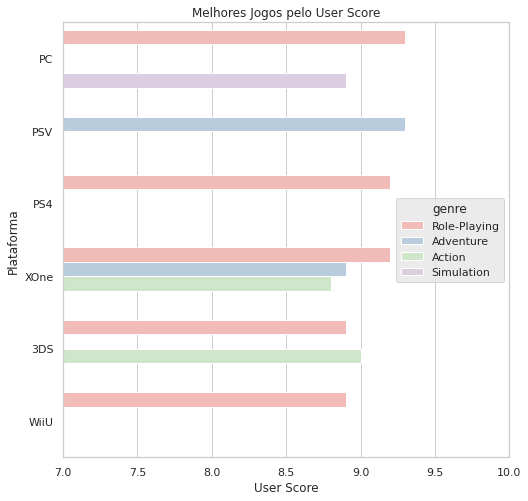

In [131]:
fig,xx = plt.subplots(figsize=(8,8))
sns.set_theme(style="whitegrid", palette="Pastel1")
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.axes_style()

xx.set_xlim(7,10)
xx = sns.barplot(x='user_score',hue = 'genre', y='platform',data=user.sort_values('user_score',ascending=False).head(10))
xx.set(xlabel='User Score', ylabel='Plataforma')
xx.set(title="Melhores Jogos pelo User Score")

##### Verificando a correlação entre avaliações e vendas

In [132]:
#Verificando os dados de critic_score 
user_score_ps4 = user.loc[(user['platform'] == 'PS4')]

In [133]:
user_score_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 1 to 1074
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             208 non-null    object 
 1   platform         208 non-null    object 
 2   year_of_release  208 non-null    int64  
 3   genre            208 non-null    object 
 4   na_sales         208 non-null    float64
 5   eu_sales         208 non-null    float64
 6   jp_sales         208 non-null    float64
 7   other_sales      208 non-null    float64
 8   total_sales      208 non-null    float64
 9   critic_score     199 non-null    float64
 10  user_score       208 non-null    float64
 11  rating           198 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 21.1+ KB


[Text(0.5, 0, 'Avaliação Usuários'), Text(0, 0.5, 'Total de Vendas(USS)')]

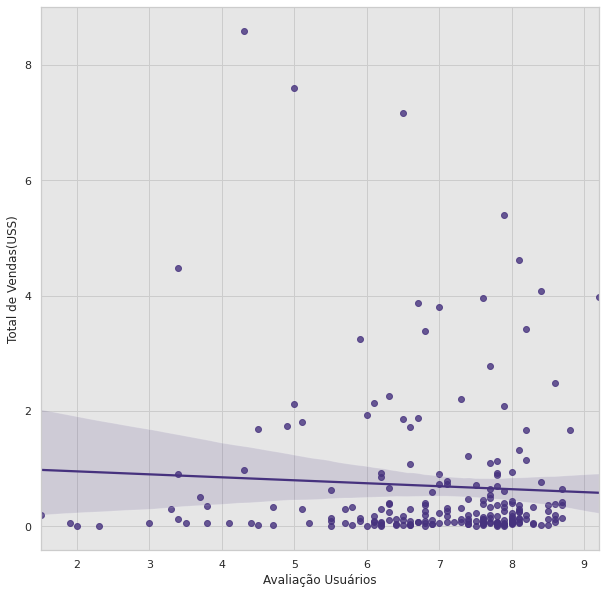

In [134]:
sns.set_theme(style="whitegrid", palette="viridis")
sns.set_style("whitegrid", {"axes.facecolor": "0.9"})
ab = sns.regplot(x='user_score', y='total_sales', data=user_score_ps4)
ab.set(xlabel='Avaliação Usuários', ylabel='Total de Vendas(USS)')

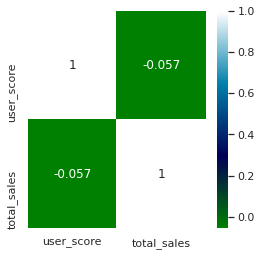

In [135]:
user_score_corr = user_score_ps4[['user_score','total_sales']]
corr = user_score_corr.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, cmap="ocean",annot=True)
plt.show()

De acordo com os conjuntos de dados filtrados é possivel inferir que também não há indícios de influência entre as notas dos usuários e as vendas das plataformas. Isso é possivel afirmar até com um pouco mais de clareza observando os TOP10 de ambas as  tabelas: enquanto na tabela 'total_sales' PS4 ocupa as 3 primeiras posições seguido por XOne, na tabela 'user_score' as mesmas plataformas aparecem somente na 3º e 6º colocações respectivamente.
Pelo gráfico de dispersão entre 'total_sales' x 'critic_score' nota-se uma inclinação negativa da reta, ou seja, há uma correlação de força fraça inversamente proporcional, verificada pelo valor calculado na matrix de correlação (-0.057).


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Boa
</div>

### Analisando as vendas dos jogos em plataformas distintas

O conjunto de dados a ser considerado para essa análise é 'games_new', cuja base é filtrada com dados a partir de 2014.

In [136]:
#Criando um novo dataframe agrupado por nome e plataforma e a média total de vendas
games_sells_platf = games_new.pivot_table(index = ['name','platform'], values = ['total_sales'], aggfunc = ['mean']).sort_values(by=('mean','total_sales'),ascending=False).head(60)

In [137]:
#Amostra do conjunto de dados
games_sells_platf.head(60)

,,mean
,,total_sales
name,platform,
Call of Duty: Black Ops 3,PS4,14.63
FIFA 16,PS4,8.58
Star Wars Battlefront (2015),PS4,7.98
FIFA 17,PS4,7.60
Call of Duty: Black Ops 3,XOne,7.39
Fallout 4,PS4,7.17
Pokemon Sun/Moon,3DS,7.14
Uncharted 4: A Thief's End,PS4,5.39


Analisando a tabela acima, percebe-se um domínio grande da plataforma PS4 onde dos 10 jogos mais vendidos, 6 são desta plataforma. Algumas comparações intressantes é possivel verificar aqui:

                                           PS4    XOne
    - Call of Duty: Black Ops 3         - 14.63   7.39 - 108%
    - FIFA 16                           - 8.58    3.25 - 27.5%
    - Star Wars Battlefront(2015)	    - 7.98    3.66 - 29.6%
    - FIFA 17                           - 7.60    2.65 - 20.1%

### Analisando o total de vendas dos jogos por gênero

In [138]:
#Criando um novo dataframe agrupado por gênero e ano e a contagem total de vendas
genre = games_new.groupby(['genre','year_of_release']).agg({'total_sales':['sum']}).sort_values(by='genre',ascending=True)

In [139]:
#Amostra do conjunto de dados
genre.head(50)

total_sales
                                     sum
genre        year_of_release            
Action       2015                  72.02
             2016                  30.11
Adventure    2015                   8.16
             2016                   3.82
Fighting     2015                   7.90
             2016                   4.47
Misc         2015                  11.57
             2016                   2.60
Platform     2015                   6.05
             2016                   3.23
Puzzle       2016                   0.01
             2015                   0.71
Racing       2015                   8.07
             2016                   2.79
Role-Playing 2015                  37.64
             2016                  18.18
Shooter      2015                  67.51
             2016                  38.22
Simulation   2015                   5.66
             2016                   1.89
Sports       2015                  40.84
             2016                  23.49
Strategy     2015                   1.85
             2016                   1.13

De acordo com a tabela acima, é possivel verificar o comportamento das vendas de jogos por gênero: 

 - Misc. (Diversos): queda de 81%
 - Simulation: queda de 80%
 - Racing: queda de 75% 
 - Adventure (Ação): queda de 62%
 - Action: queda de 58%
 - Platform: queda de 50% 
 - Role_Playing (RPG):queda de 51% 
 - Shooter (Tiro/Armas): queda de 43%
 - Fighting: queda de 42%
 - Sports: queda de 42%
 - Strategy: queda de 27%

## Analisando um perfil de usuário de cada região (NA / EU / JP/Other)

O conjunto de dados a ser considerado para essa análise é 'games_new', cuja base é filtrada com dados a partir de 2014, pois neste momento não seria de grande valia fazer análises com dados muito antigos.

### Filtrando as 5 principais plataformas de cada região

In [140]:
#Criando um dataframe da coluna 'platform' agrupada com as somas das vendas nas regiões
region = games_new.groupby(['platform']).agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum','total_sales':'sum'}).sort_values(by='na_sales',ascending=False).reset_index().head(10)

In [141]:
#Amostra do conjunto de dados
region.head()

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,PS4,63.86,83.54,12.05,28.70,188.15
1,XOne,50.30,28.10,0.18,7.71,86.29
2,3DS,10.31,7.39,23.55,1.67,42.92
3,WiiU,8.86,6.49,4.12,1.48,20.95
4,X360,8.05,4.21,0.00,1.22,13.48


### Filtrando os 5 principais gêneros

In [142]:
#Criando um dataframe da coluna 'genre' agrupada com as somas das vendas nas regiões
genre_region = games_new.groupby(['genre']).agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum','total_sales':'sum'}).sort_values(by='total_sales',ascending=False).reset_index()

In [143]:
genre_region

,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Shooter,48.18,40.28,3.79,13.48,105.73
1,Action,33.68,34.82,23.05,10.58,102.13
2,Sports,26.31,27.82,1.65,8.55,64.33
3,Role-Playing,19.82,17.21,13.41,5.38,55.82
4,Misc,5.58,4.26,3.19,1.14,14.17
5,Fighting,5.54,3.72,1.54,1.57,12.37
6,Adventure,3.84,4.67,2.22,1.25,11.98
7,Racing,2.82,6.52,0.29,1.23,10.86
8,Platform,3.78,3.20,1.42,0.88,9.28
9,Simulation,1.36,3.74,1.93,0.52,7.55


### Influência da classificação ESRB nas vendas em cada região

In [144]:
#Filtrando por 'platform','year_of_release'e'rating' agrupada com as somas das vendas nas regiões
esrb_plat = games_new.groupby(['platform','year_of_release','rating']).agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum','total_sales':'sum'}).sort_values(by='total_sales',ascending=False).reset_index().head(20)

In [145]:
#Amostra do conjunto de dados
esrb_plat.head(20)

,platform,year_of_release,rating,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,PS4,2015,M,15.28,19.93,2.50,6.88,44.59
1,PS4,2016,M,8.62,12.38,1.24,4.06,26.30
2,XOne,2015,M,14.64,7.16,0.08,2.23,24.11
3,PS4,2016,T,5.87,7.15,1.43,2.55,17.00
4,PS4,2015,E,5.05,8.99,0.27,2.67,16.98
5,PS4,2015,T,5.71,6.15,1.33,2.34,15.53
6,PS4,2016,E,3.58,8.07,0.25,2.17,14.07
7,XOne,2016,M,7.75,4.55,0.01,1.18,13.49
8,XOne,2015,E,4.32,3.72,0.03,0.75,8.82
9,XOne,2015,T,5.24,2.30,0.03,0.76,8.33


In [146]:
#Filtrando por 'genre','year_of_release'e'rating' agrupada com as somas das vendas nas regiões
esrb_region = games_new.groupby(['genre','year_of_release','rating']).agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum','total_sales':'sum'}).sort_values(by='total_sales',ascending=False).reset_index().head(20)

In [147]:
#Amostra do conjunto de dados
esrb_region.head(20)

,genre,year_of_release,rating,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Action,2015,M,11.94,12.59,2.07,4.03,30.63
1,Sports,2015,E,12.03,13.34,0.56,3.97,29.90
2,Shooter,2016,M,10.50,9.98,0.61,3.08,24.17
3,Role-Playing,2015,M,8.32,8.85,0.48,2.51,20.16
4,Sports,2016,E,6.15,10.60,0.37,2.58,19.70
5,Shooter,2015,M,8.07,5.91,0.50,2.10,16.58
6,Action,2015,E10+,5.76,4.81,0.84,1.34,12.75
7,Action,2016,M,3.71,5.05,0.16,1.35,10.27
8,Shooter,2016,T,3.93,4.34,0.36,1.45,10.08
9,Shooter,2015,T,4.82,2.48,0.09,0.93,8.32


De maneira geral a ESRB influencia nas vendas de jogos, principalmente nos Estados Unidos, Canadá e México (sua área de atuação). Na primeira tabela, não é possivel verificar tal afirmação pois a classificação ESRB incide sobre jogos e não sobre plataformas (consoles), pois em geral uma plataforma possui uma vasta coleção de jogos disponíveis com as mais variadas classificações.

Já verificando a segunda tabela, é possivel atestar a afirmação da influência da classificação. Dos 10 jogos mais vendidos, 5 possuem a classificação para maiores de 17 anos. Outro fato interessante é que para jogos com esta classificação, as vendas da região EU ficam bem próximas (ultrapassando em alguns casos) da região NA.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ótimo!
</div>

## Teste das Hipóteses

Na estatística, hipótese ou teoria da decisão é difinida como qualquer afirmativa sobre uma medida numérica calculada a partir de uma amostra, como exemplo a média, variância, proporção, etc.

Segundo a literatura, o objetivo de um teste de hipóteses é “fornecer uma metodologia que nos permita verificar se os dados amostrais trazem evidências que apoiem ou não uma hipótese (estatística) formulada”, ou seja, nos auxilia a tomar decisões sobre uma ou mais populações baseado na informação obtida da amostra, associado a um risco máximo de erro. 

### Verificando a distribuição dos dados

O conjunto de dados a ser considerado para essa análise é 'user', já filtrado as linhas nulas e 'tbd' no Cap. 3.5. Toda a análise foi feita partindo do conjunto 'games_new', cuja base é filtrada com dados a partir de 2014, pois neste momento não seria de grande valia fazer análises com dados muito antigos.

In [148]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 1096
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             600 non-null    object 
 1   platform         600 non-null    object 
 2   year_of_release  600 non-null    int64  
 3   genre            600 non-null    object 
 4   na_sales         600 non-null    float64
 5   eu_sales         600 non-null    float64
 6   jp_sales         600 non-null    float64
 7   other_sales      600 non-null    float64
 8   total_sales      600 non-null    float64
 9   critic_score     570 non-null    float64
 10  user_score       600 non-null    float64
 11  rating           577 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 60.9+ KB


In [149]:
#Filtrando o dataframe games_new
games_new_xone = user.loc[user['platform'] == 'XOne']
games_new_pc = user.loc[user['platform'] == 'PC']

In [150]:
#Amostra do conjunto de dados
games_new_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
73,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,1.28,84.0,5.4,M
81,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,1.17,96.0,7.9,M
131,The Witcher 3: Wild Hunt,PC,2015,Role-Playing,0.21,0.46,0.0,0.05,0.72,93.0,9.3,M
140,Farming Simulator 17,PC,2016,Simulation,0.03,0.58,0.0,0.04,0.65,64.0,8.0,E
164,Overwatch,PC,2016,Shooter,0.25,0.24,0.0,0.04,0.53,91.0,6.8,T


In [151]:
#Verificando a distribuição normal dos dados

def normality(data):
    test_stat_normality, p_value_normality = st.shapiro(data)
    print('p_value:', p_value_normality)
    if p_value_normality <0.05:
        print("Hipótese nula rejeitada. Os dados não são normalmente distribuídos.")
    else:
        print("Não é possível rejeitar a hipótese nula. Os dados são normalmente distribuídos.")   

normality(games_new_xone['user_score'])
normality(games_new_pc['user_score'])

p_value: 0.00013734724780078977
Hipótese nula rejeitada. Os dados não são normalmente distribuídos.
p_value: 0.0007016165181994438
Hipótese nula rejeitada. Os dados não são normalmente distribuídos.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com o teste de normalidade (embora eu te garanto que você ainda fará muitos testes t que não passam nesse teste). =)

Nesse mesmo sentido poderia ser interesante testar a igualdade de variâncias com o teste de Levine.
</div>

Conforme verificado nos gráficos e demonstrado acima, os dados não seguem um modelo de distribuição normal. Para a análise em questão, será considerado uma distribuição normal dos dados.

### Testando a Hipótese 1

Existem dois tipos de hipóteses que são testados: a hipótese nula (H0) e a hipótese alternativa (H1). A hipótese nula geralmente é a hipótese padrão que assume qua não há diferença significativa entre as amostras e a hipótese alternativa é a hipótese que assume que existe diferença entre as amostras.

A hipótese 1 (que queremos testar) afirma que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. Portanto:

   - H0(nula): mi(s) = mi(u)              - classificação media dos usuários iguais
   - H1(alternativa): mi(s) != mi(u)      - classificação media dos usuários diferente
   
Em um teste de hipótese, parte-se do pressuposto que a hipótese H0(nula) é verdadeira, ou seja, as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. Como se quer testar igualdade entre as amostras, iremos aplicar o teste bilateral TipoT.

In [152]:
games_new_pc['user_score'].mean()

6.29642857142857

In [153]:
alpha = 0.05

results = st.ttest_ind(games_new_xone['user_score'], games_new_pc['user_score'], equal_var = False)

print('p-value:', results.pvalue)


if results.pvalue < alpha:    
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 0.19209596739530854
Nós não podemos rejeitar a hipótese nula


Conforme valor encontrado em p-value, há indícios de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

### Testando a Hipótese 2

A hipótese 2 afirma que a classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes. Portanto:
        
   - H0(nula): mi(s) = mi(u)              - classificação media dos usuários iguais
   - H1(alternativa): mi(s) != mi(u)      - classificação media dos usuários diferente

In [154]:
#Filtrando o dataframe original (users_all) somente com os usuários da região 'NY-NJ'
user_action = user.loc[user['genre'] == 'Action']
user_sports = user.loc[user['genre'] == 'Sports']

In [155]:
#Amostra do conjunto de dados
user_action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
8,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,4.62,86.0,8.1,T
15,Batman: Arkham Knight,PS4,2015,Action,1.53,1.69,0.10,0.64,3.96,87.0,7.6,M
19,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,3.42,93.0,8.2,M
20,Assassin's Creed Syndicate,PS4,2015,Action,0.81,1.99,0.07,0.52,3.39,76.0,6.8,M
30,Bloodborne,PS4,2015,Action,1.03,0.81,0.26,0.38,2.48,92.0,8.6,M


In [156]:
#Amostra do conjunto de dados
user_sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5.0,E
16,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,3.87,87.0,6.7,E10+
23,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,3.25,84.0,4.4,E
24,Madden NFL 16,PS4,2015,Sports,2.34,0.30,0.00,0.60,3.24,83.0,5.9,E


In [157]:
alpha = 0.05

results = st.ttest_ind(user_action['user_score'], user_sports['user_score'], equal_var = False)

print('p-value:', results.pvalue)


if results.pvalue < alpha:    
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 3.5441313911263755e-10
Nós rejeitamos a hipótese nula


Conforme valor encontrado em p-value, há indícios de que as classificação média dos usuários do gênero Sport e Action sejam diferentes.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Aqui temos um erro.

O que está sendo testato como H0 por padrão no teste t é a igualdade das médias das amostras. Ao rejeitarmos H0 estamos rejeitando a igualdade em favor da diferença, que é o oposto da sua conclusão acima.
</div>

## Conclusão

O propósito do estudo é identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.

No capitulo 1 foi carregado as bases de dados e bibliotecas que seriam utilizadas na análise.

No capítulo 2 foi verificado nos conjuntos de dados:
  - os valores ausentes e duplicados
  - alteração nos nomes das colunas
  - correção do tipo de dado
  - eliminação das linhas com valor 0 
  - criado uma coluna somente com o estado/distrito dos usuários.
  - calculado quantidade de mensagens por usuários por mês
  - calculado quantidade de dados utilizado pr usuário por mês
  - calculado quantidade e duração das chamadas por usuário por mês

Com relação aos valores nulos de todas as colunas, a opção adotada foi possibilidade de copiar essa informação verificando o lançamento do mesmo jogo em outras plataformas. Possiveis razões para os valores nulos: 
     
   - jogo com previsão de lançamento para várias plataformas, mas por atrasos do fabricante ou outras razões, a empresa lança o jogo em somente uma plataforma, 
   - lançamento do jogo com atraso
   - problemas intrísecos da própria base de dados (inserção ou na extração dos dados)
Após o tratamento dos valores nulos nas colunas, o conjunto de dados ficou:

  - coluna 'name'             - 16713 linhas - 0% nulos
  - coluna 'platform'         - 16713 linhas - 0% nulos
  - coluna 'year_of_release'  - 16713 linhas - 0% nulos
  - coluna 'genre'            - 16713 linhas - 0% nulos
  - coluna 'na_sales'         - 16713 linhas - 0% nulos
  - coluna 'eu_sales'         - 16713 linhas - 0% nulos
  - coluna 'jp_sales'         - 16713 linhas - 0% nulos
  - coluna 'other_sales'      - 16713 linhas - 0% nulos
  - coluna 'critic_score'     -  8837 linhas - 47% nulos
  - coluna 'user_score'       - 10301 linhas - 38% nulos
  - coluna 'rating'           - 10239 linhas - 37% nulos

Foram expostas algumas hipóteses sobre a quantidade de valores nulos, como difusão das avaliações de especialistas, jogos muito antigos, problemas intrínsecos da base de dados e a obrigatoriedade da classificação ESRB.
   
Portanto, devido a quantidade e impacto que poderá trazer na análise dos dados, optou-se por manter os valores como NaN.

Na coluna 'year_of_release', há cerca de 140 linhas com valor 0. Optou-se também pela não exclusão dessas linhas e realizar os ajustes necessários no momento de plotar os gráficos.

A análise do conjunto de dados inicia-se no capítulo 3, com a criação do gráfico mostrando o comportamento das vendas de videogame ao longo do tempo.
No item 3.2 é apresentado um gráfico co a distribuição das vendas por plataforma, onde é identificado as 5 maiores plataformas em vendas TOP5 (PS2, X360,PS3,Wii e DS). Após identificar os Top5, inicia-se uma análise de cada uma das plataformas para extrair insights e verificar o comportamento do mercado de games como um todo. É apresentado algumas observações no final do item 3.3 de cada plataforma.

A construção do modelo inicia-se no item 3.4 sendo feita um filtro no conjunto de dados 'games' com plataformas a partir de 2014, gerando um novo dataframe ('games_new'). É verificado quais jogos são os mais vendidos e analisado as plataformas om possíveis potenciais de crescimento. São apresentados boxplots das plataformas com o intuito de verificar a variabilidade das vendas ao longo do tempo e alguns insights foram extraídos. 

Além do proposto na análise, um ponto interessante a ser verificado é se ha influência das avaliações dos críticos e dos usuários nas vendas de um jogo. Isso foi feito no item 3.5 tanto para 'critic_score' como para 'user_score' onde foi apresentado algumas tabelas e gráficos indicando não haver indícios da influência da avaliação de usuários e especialistas em um determinado jogo. Um ponto interessante a ser verificado afim de expandir a verificação de correlação entre as variáveis é monitorar as vendas de um determinado jogo ANTES e DEPOIS da publicação das avaliações e verificar se houve alteração nas vendas.

O mesmo procedimento feito para os jogos foi feito para as plataformas no item 3.6 onde também foi verificado se há influência das avaliações dos críticos e dos usuários nas vendas de plataformas. Essa análise foi expandida pra saber se há influência das avaliações em quais os gêneros e quais plataformas. Os gráficos de dispersão e correlação foram apresentados, demonstrando que há indícios da influência das avaliações dos críticos nas vendas, porém não foi verificado qualquer relação com o gênero do jogo.
Já com relação às avaliações dos usuários, percebeu-se até com um pouco mais de clareza pelos gráficos apresentados que a relação, além de fraca (quase nula), é inversamente proporcional.

No item 3.7 é analisado as vendas em plataformas distintas, ou seja, quais plataformas um determinado jogo é mais rentável. Foi apresentado alguns números comparando as plataformas PS4 e XOne. Porém alguns pontos aqui devem ser ressaltados:
 - o sucesso/fracasso de um jogo depende da plataforma. Isso é visto principalmente nos primeiros meses de vendas;
 - há jogos que tem melhor performance em determinadas plataformas que em outras;
 - o studio criador dos jogos faz parceria de exclusividade com alguma plataforma, por exemplo, no primeiro ano de venda e, somente depois, é lançado pra outras plataformas;
 - o marketshare de cada plataforma deve ser levado em consideração, pois 1 milhão de jogos vendidos pra uma plataformas que detém 35% do mercado é em diferente de 1 milhão de jogos vendidos por uma plataforma que detém somente 15%, por exemplo.

O total de vendas por gênero foi verificado no item 3.8 com  objetivo de verificar se há algum gênero que se destaca dos demais e por qual motivo. Foi verificado a relação gênero/vendas e, devido a queda que as plataformas de games vêm sofrendo nos últimos anos, a análise foi feita não em qual plataforma cresceu, mas sim em qual plataforma menos caiu, pois todas apresentaram queda, isso devido ao comportamento do mercado.
Os gêneros que apresentaram uma queda menos acentuada são : Strategy, Sports e Fighting.


No item 4.1 é feito uma análise do perfil de usuário de cada região, onde é possível verificar alguns pontos importantes:
 - os usuários NA e EU possuem caracteristícas  de gênero de jogos parecidas, onde os gêneros que mais se destacam são Shooter, Action, Sport e RPG. Já nos gêneros menos vendidos, o gênero Simulation vendeu mais na região EU do que na região NA;
 - a região 'Other' composta por outros mercados como America do Sul e Central, Ásia e África, parece seguir o comportamento das regiões NA e EU;
 - a região JN é um caso completamente oposto do restanet do mercado de games. Enquanto o gênero Shooter dominam as vendas nas regiões NA e EU, na região JN aparece apenas na 4º colocação. Action e RPG são os gêneros mais rentáveis. 

A influência da classificação ESRB foi analisada no item 4.3, onde foram apresentados alguns filtros por plataforma e gênero. Não foi possivel verificar que há influência da classificação ESRB nas vendas de plataformas, pois uma plataforma em geral possui uma vasta coleção de jogos disponíveis dos mais diversos gêneros e classificações. Já na tabela filtrada por jogos e regiões, verifica-se a forte influência da classificação, principalmente comparando jogos com classificação +17 vendidos nas regiões NA e EU, onde nesta, nã há influência da ESRB.
 
No capítulo 5 fez-se o teste das hipóteses oferecidas para análise:
     
   - Hipótese 1: as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. Verificou-se pelo teste de hipóteses o que os cálculos mostraram: há evidências para sustentar essa afirmação. Ou seja, pensando na população total de classificações dos usuários, pode-se inferir que as classificações médias dos usuários das plataformas XOne e PC realmente sejam iguais;
   - Hipótese 2:  a classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes. Também verificou-se pelos testes que há indícios de que a de que as classificação média dos usuários do gênero Sport e Action sejam diferentes.

Como o objetivo do estudo é analisar jogos/plataformas com possiblidade de sucesso em vendas com o intuito de planejar campanhas publicitárias, a análise até aqui possibilitou alguns insights:

  - o ciclo de vendas de uma plataforma no mercado duram em média, 10 anos. Com isso, sugere-se levar em consideração uma plataforma recente como PS4 ou XOne. Há também a questão da retrocompatibilidade, um ponto crítico para o PS4 que tem algumas limitações quanto a isso;
  - tendo como ponto de partida o XONe, há outro quesito em relação a plataforma que é a região. Como visto acima, PS4 e XOne tem ótimas vendas nas regiões NA e EU e Others. Porém na região JN (importante mercado de games) não se saem bem devido ao fato de os consumidores terem preferências pelos portáteis, principalmente da plataforma 3DS (Nintendo);
  - outro ponto analisado é o gênero do jogo. Assim como a plataforma, na região JN os jogos de maior sucesso são diferentes das demais regiões.
  - há também a questão da classificação ESRB que tem maior influência na região NA, então dependendo do gênero do jogo, algumas restrições deverão ser consideradas;
 
Com isso, a sugestão do uma estratégia de mercado seria:

  - adotar a plataforma XOne tendo como foco maior as regiões NA, EU e Other
  - os gêneros Sports e Action seriam interessantes como proposta de jogos, uma  vez que são gêneros com sucessos nessas regiões e, no caso da região NA, é possivel que tenham menos problemas com a classificação da ESRB.
  - considerando a região JN, uma plataforma interessante seria a 3DS que possui jogos proprietários e exclusivos mais focado nos gêneros Actions e RPG ( gêneros de maior sucesso nessa região).


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Seu trabalho está incrível, de verdade!
Parabéns!

Temos apenas esse pequeno ponto de melhoria no segundo teste de hipótese E SÓ! Estou impressionado!

Até breve!
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Olá Rafael. Realmente foi falta de atenção minha. Obrigado pelas observações. 
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Boa!

Novamente parabéns pelo trabalho e até breve!
</div>